# Greedy Search Algorithm

<h3>Algorithm Implementation</h3>

In [22]:
from heapq import heapify, heappush
import math
from graph import Graph

def distance_heuristic(graph, node1, node2):
    return math.sqrt( (graph[node1][0][0] - graph[node2][0][0]) ** 2 + (graph[node1][0][1] - graph[node2][0][1]) ** 2 )

def greedy_search(graph: Graph, start: str, goal: str) -> bool:
    visited = set([start])

    curr_node = start
    fringe = [ (distance_heuristic(graph, start, goal), start, [start],) ]
    heapify(fringe)

    path = [start]

    while fringe:
        _, curr_node, curr_path = fringe.pop()

        if curr_node == goal:
            return curr_path

        visited.add(curr_node)

        for neighbour in graph.get_neighbours(start):
            if neighbour not in visited:
                new_path = curr_path + [neighbour]

                heappush(fringe, tuple([distance_heuristic(graph, neighbour, goal), neighbour, new_path]))

    return

##### A. The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

In [23]:
import time
from random import shuffle
from graph import load_romania, Graph

romania: Graph = load_romania()

romanian_cities: list[str] = romania.get_nodes()
shuffle(romanian_cities)

print(romanian_cities)

random_cities: list[str] = romanian_cities[:10]

for city1 in random_cities:
    for city2 in random_cities:
        if city1 is not city2:
            path = greedy_search(graph=romania, start=city1, goal=city2)
            start_time = time.perf_counter()
            time_taken = time.perf_counter() - start_time

            print(f"Trying: {city1} -> {city2}")
            if path:
                print(f"Found path: {' -> '.join(path)}, Length: {len(path)}")
            else:
                print("Cannot find path.")
            print(f"{time_taken:.8f} seconds") 


['Oradea', 'Drobeta', 'Iasi', 'Bucharest', 'Urziceni', 'Timisoara', 'Giurgiu', 'Fagaras', 'Hirsova', 'Sibiu', 'Vaslui', 'Pitesti', 'Craiova', 'Eforie', 'Rimnicu Vilcea', 'Zerind', 'Lugoj', 'Neamt', 'Mehadia', 'Arad']
Trying: Oradea -> Drobeta
Cannot find path.
0.00000127 seconds
Trying: Oradea -> Iasi
Cannot find path.
0.00000060 seconds
Trying: Oradea -> Bucharest
Cannot find path.
0.00000039 seconds
Trying: Oradea -> Urziceni
Cannot find path.
0.00000055 seconds
Trying: Oradea -> Timisoara
Cannot find path.
0.00000060 seconds
Trying: Oradea -> Giurgiu
Cannot find path.
0.00000056 seconds
Trying: Oradea -> Fagaras
Cannot find path.
0.00000051 seconds
Trying: Oradea -> Hirsova
Cannot find path.
0.00000064 seconds
Trying: Oradea -> Sibiu
Found path: Oradea -> Zerind -> Sibiu, Length: 3
0.00000052 seconds
Trying: Drobeta -> Oradea
Cannot find path.
0.00000050 seconds
Trying: Drobeta -> Iasi
Cannot find path.
0.00000055 seconds
Trying: Drobeta -> Bucharest
Cannot find path.
0.00000053 sec

##### D. Create random graphs with a number of nodes n = 10, 20, 30, 40. Randomly connect nodes with the probability of edges p = 0.2, 0.4, 0.6, 0.8. In total, you will have 16 graphs.

In [24]:
import random

def create_random_graph(num_nodes: int, edge_prob: float) -> Graph:
    graph = Graph()
    
    # add all nodes to the graph
    for i in range(num_nodes):
        latitude = random.random()
        longitude = random.random()
        graph.add_node(str(i), latitude, longitude)
        
    # randomly connect nodes with probability edge_prob
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < edge_prob:
                weight = random.randint(1, 10)
                graph.insert_edge(str(i), str(j), weight)
    
    return graph


In [25]:
from random import shuffle
import timeit

node_numbers = [10, 20, 30, 40]
edge_probabilities = [ 0.2, 0.4, 0.6, 0.8]

experiment_graphs = []

for num_nodes in node_numbers:
    for edge_prob in edge_probabilities:
        experiment_graphs.append((f"Number of nodes: {num_nodes}, Probability of Edges: {edge_prob}", create_random_graph(num_nodes, edge_prob)))

results = {}

for label, graph in experiment_graphs:
    nodes = graph.get_nodes()

    shuffle(nodes)

    random_5_nodes = nodes[:5]

    results[label] = {}

    for node1 in random_5_nodes:
        for node2 in random_5_nodes:
            if node1 is not node2:
                path = greedy_search(graph, node1, node2)
                time_taken = timeit.timeit(lambda: greedy_search(graph, node1, node2), number=5)

                results[label][f"[{node1} -> {node2}]"] = (time_taken * 1000, path)

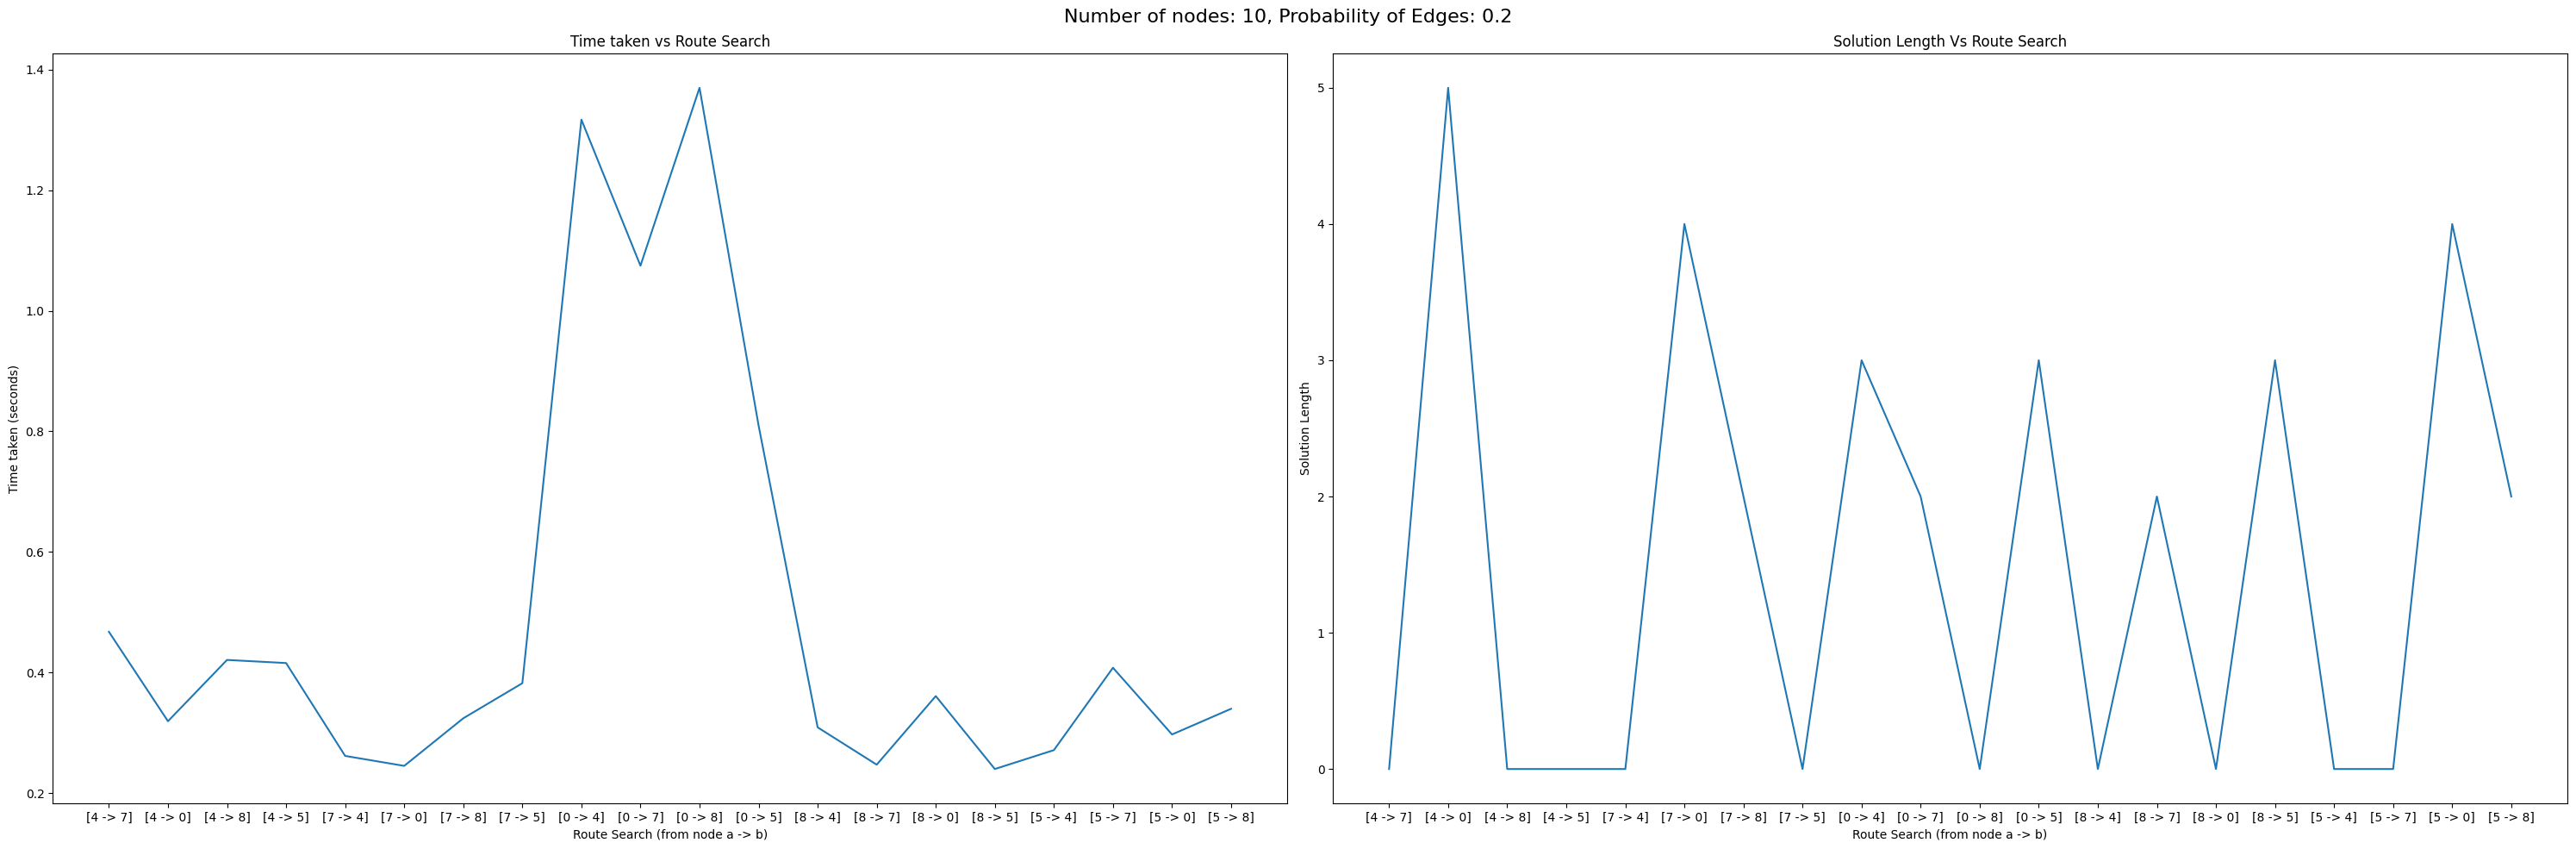

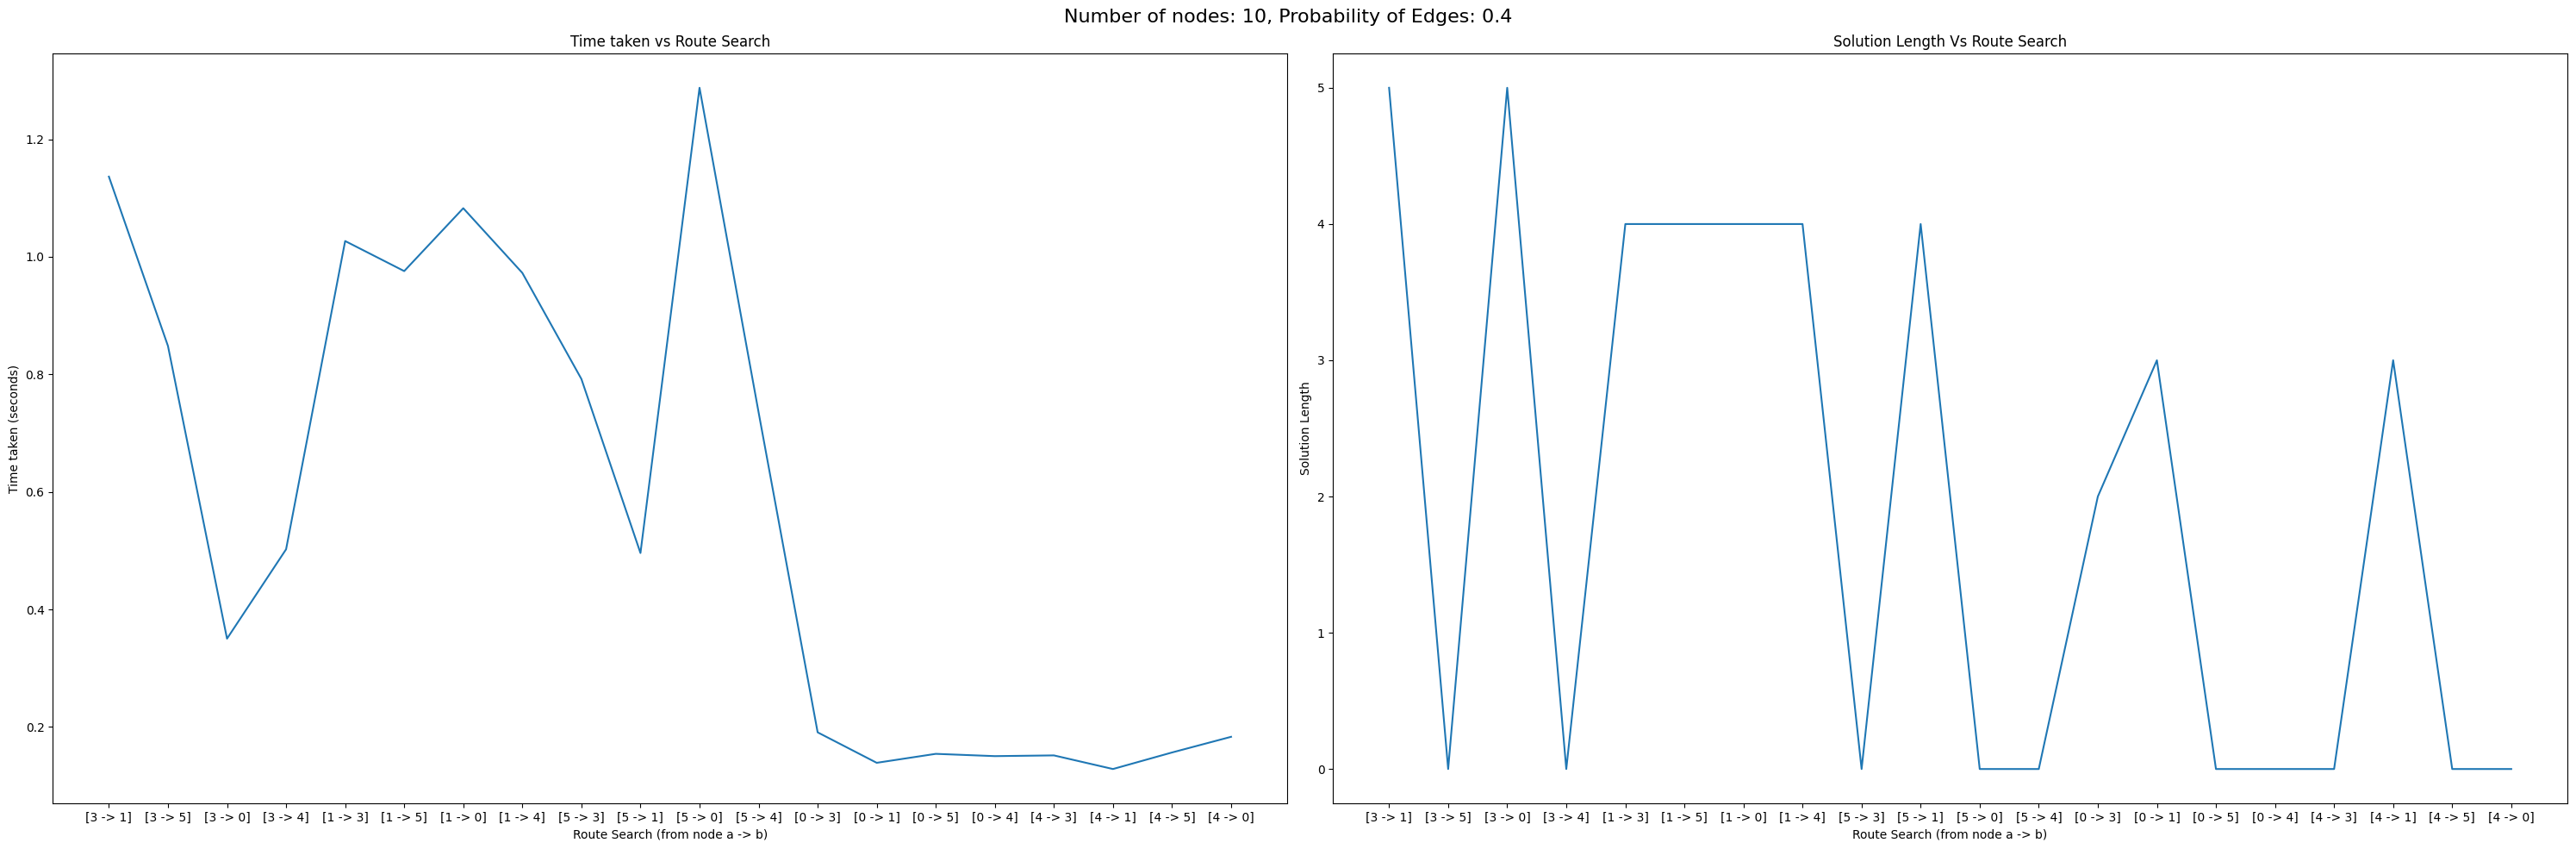

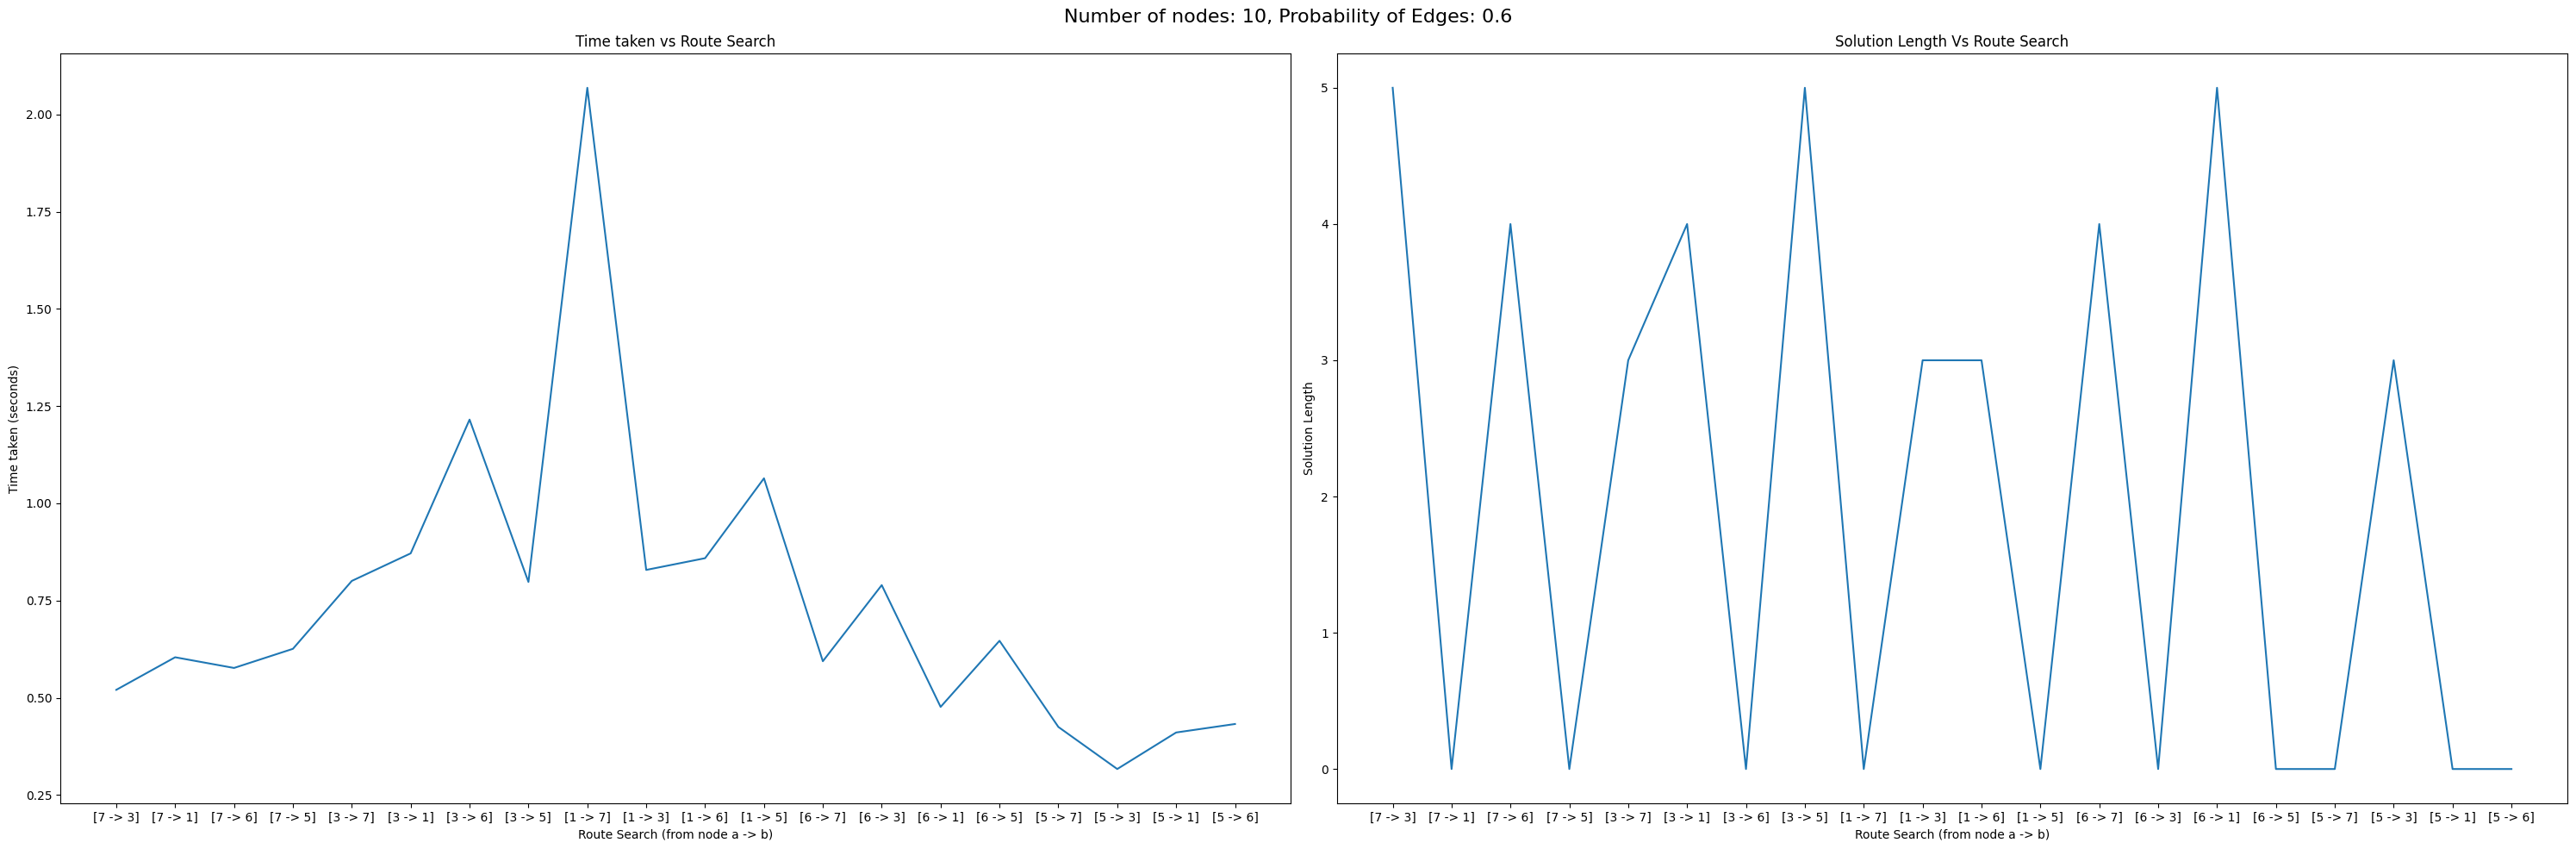

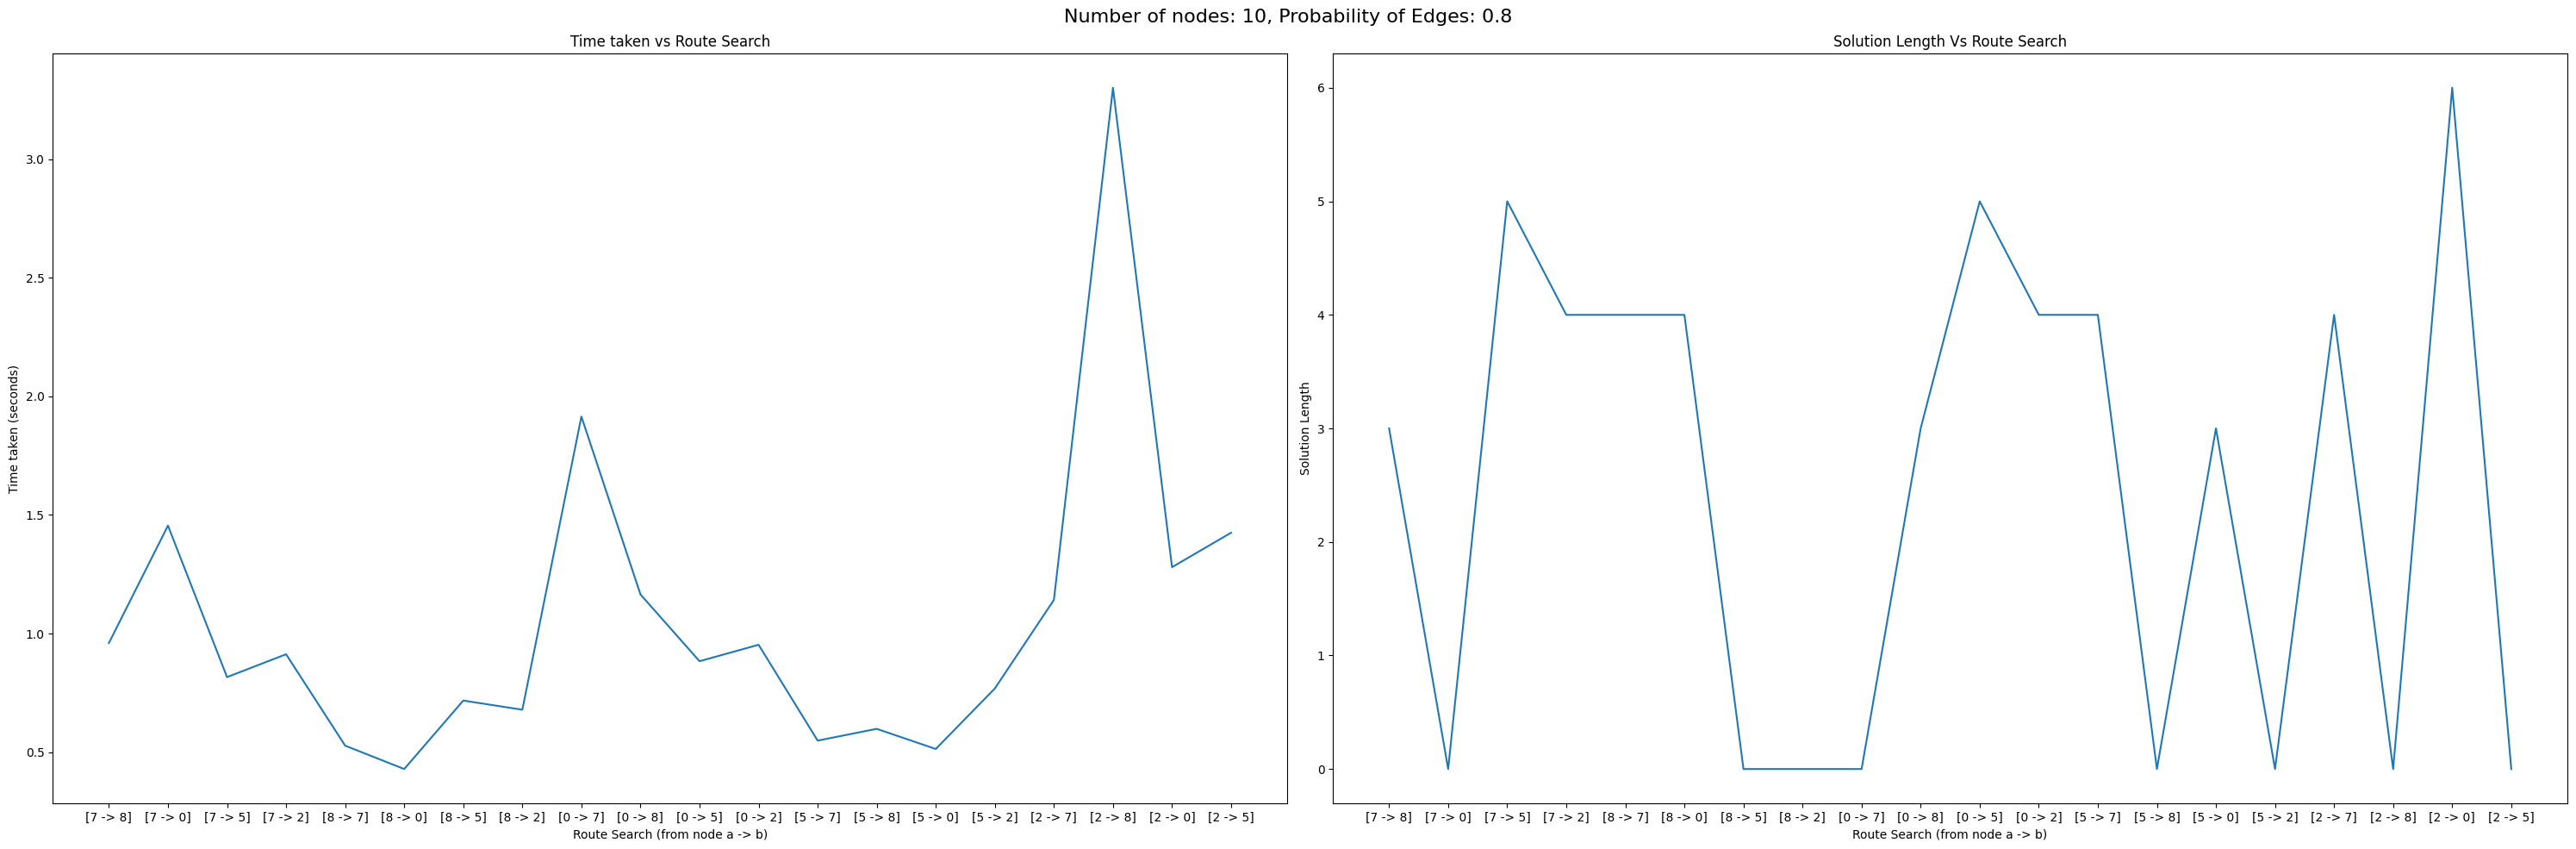

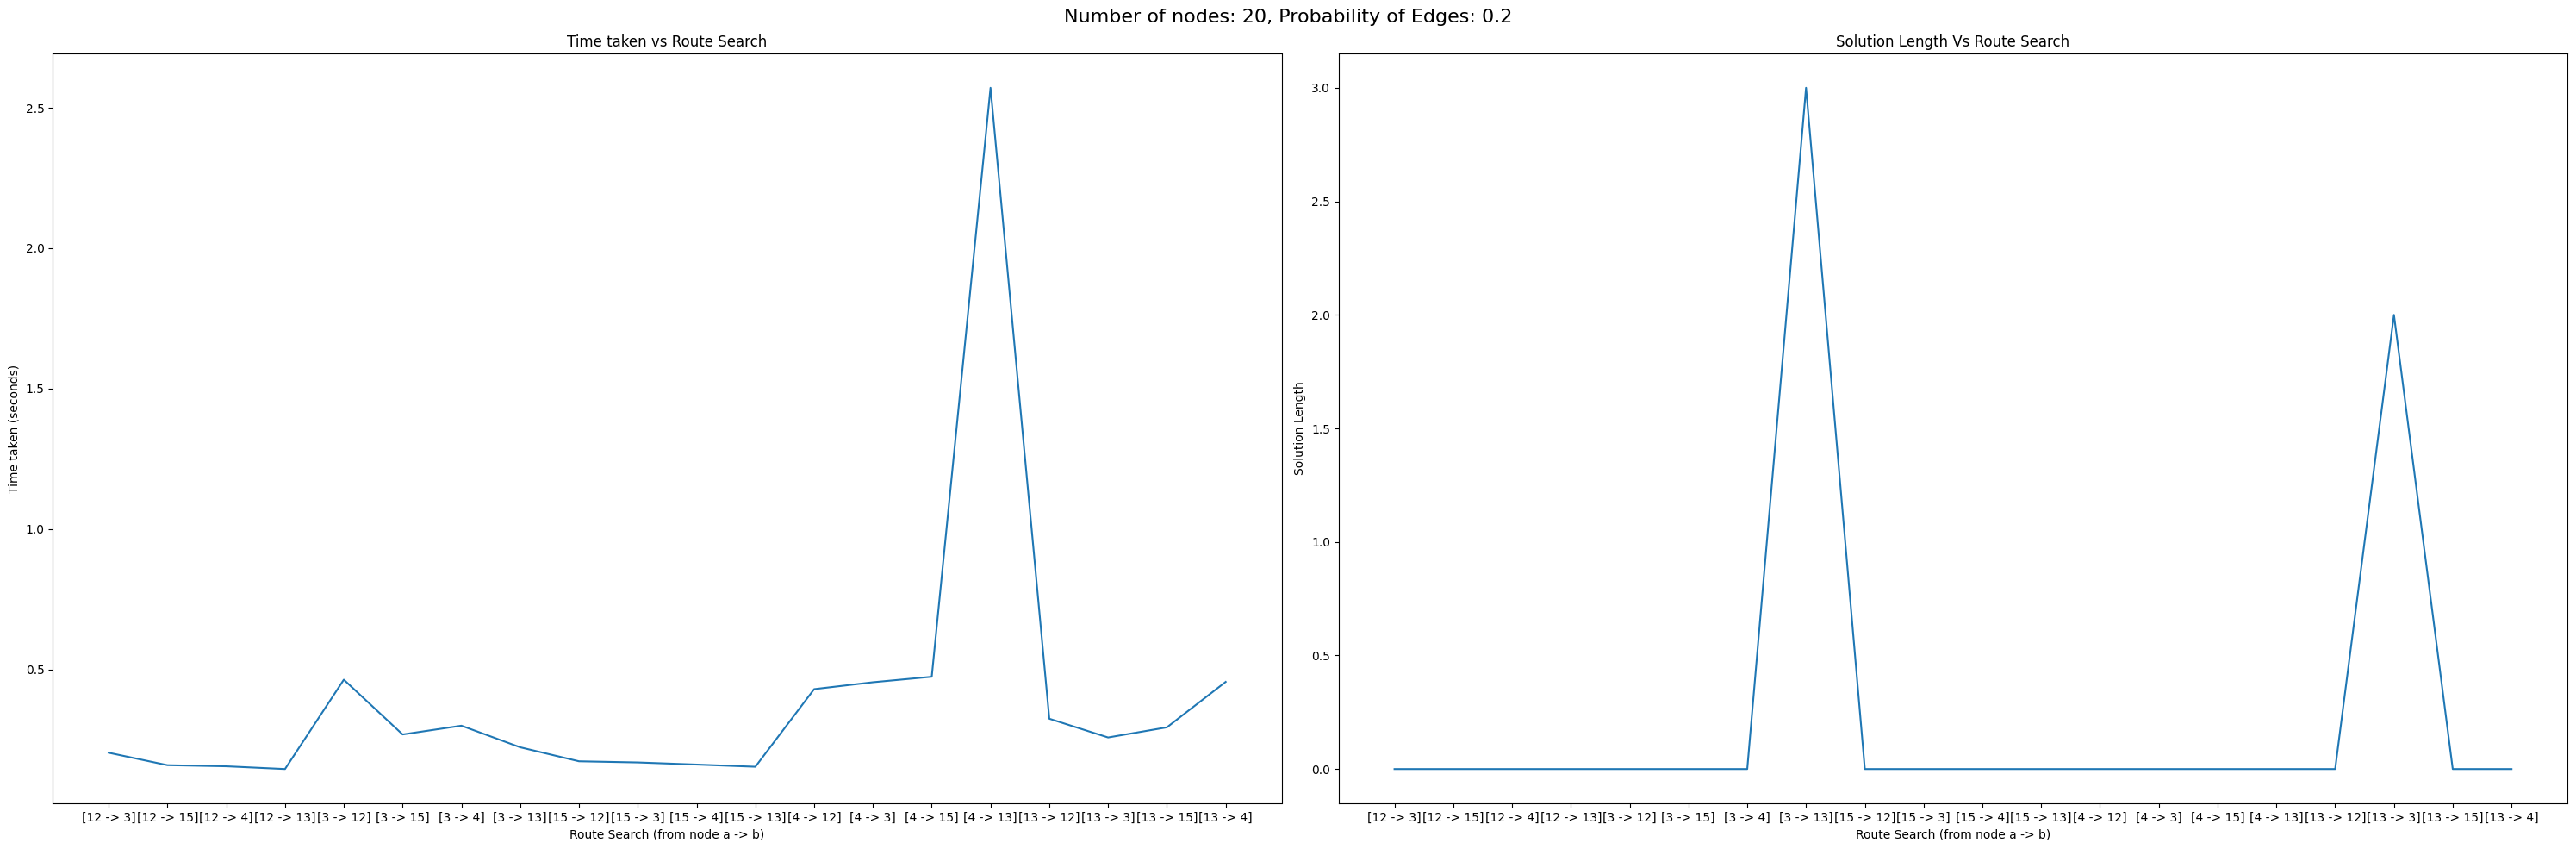

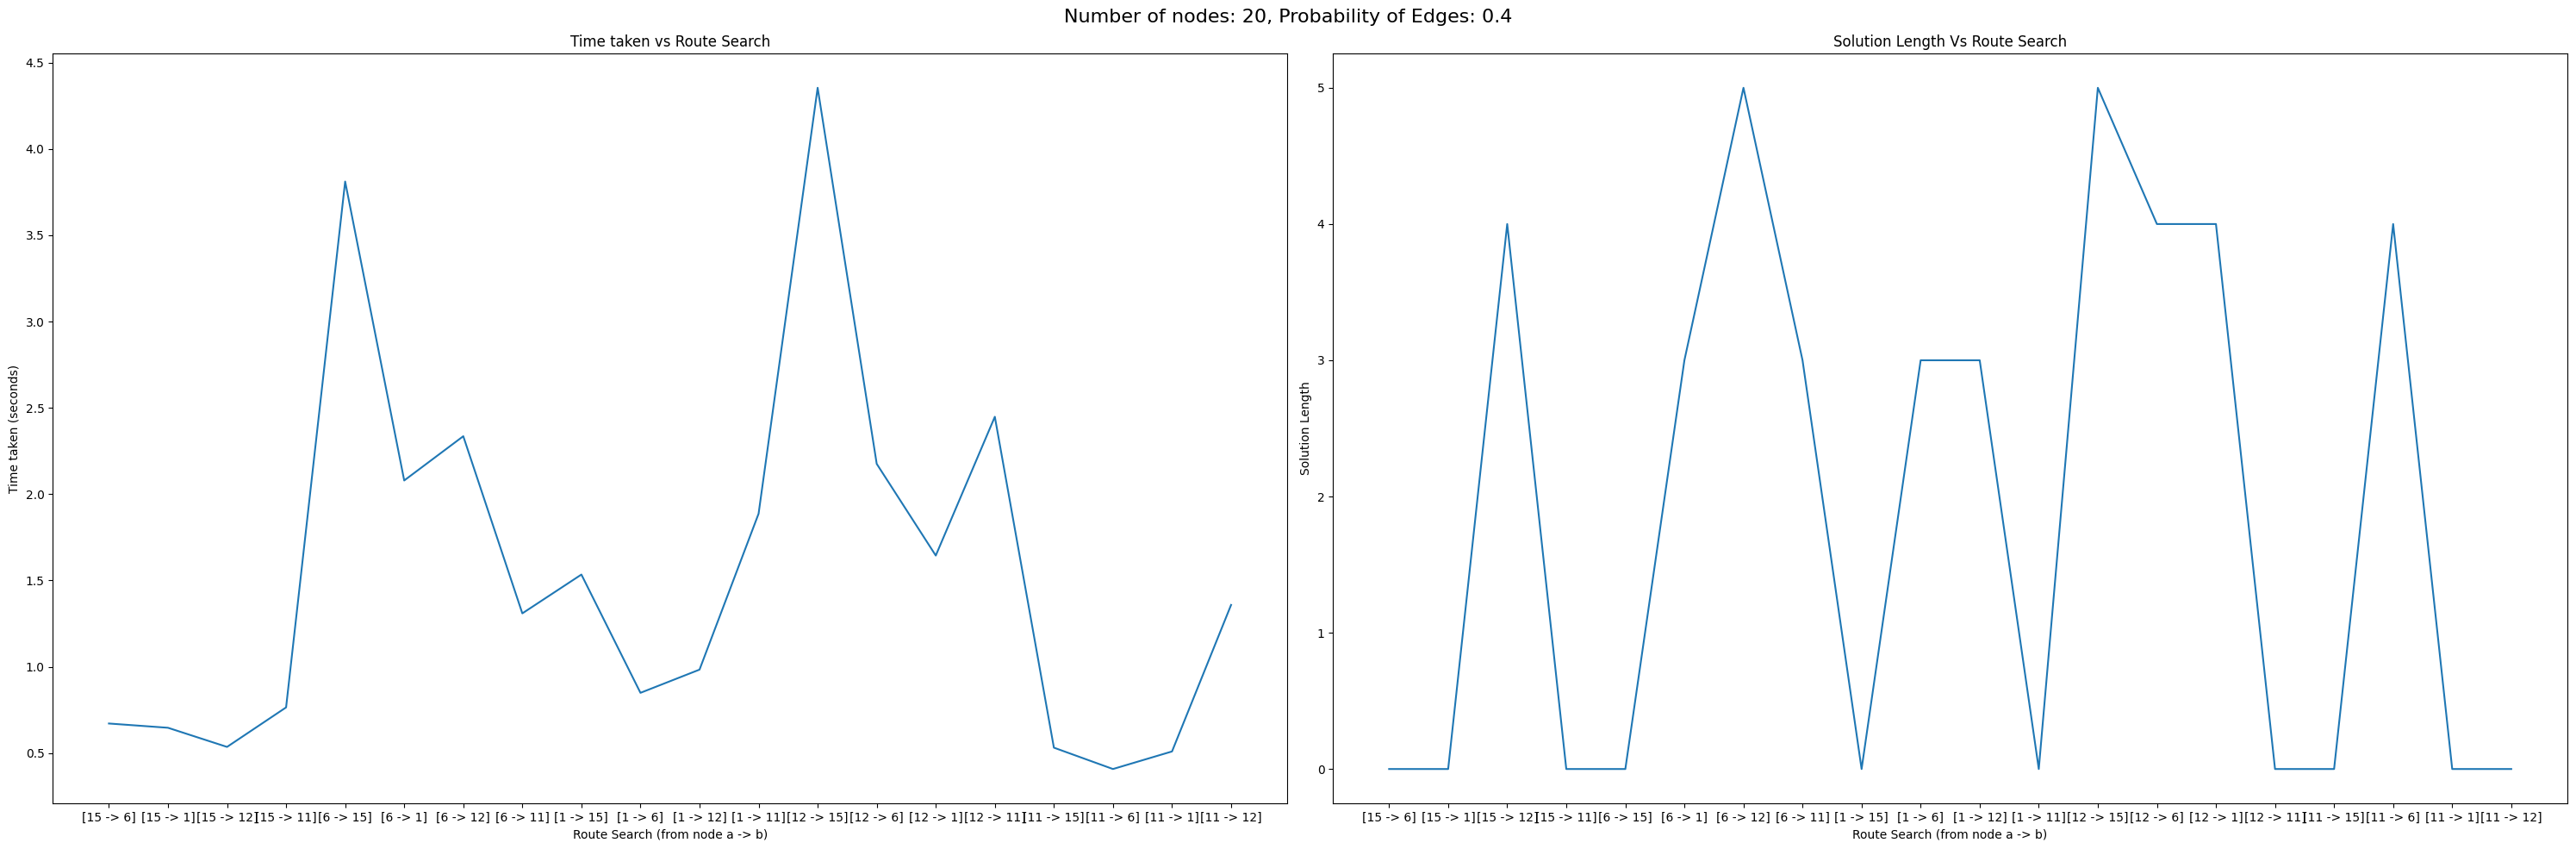

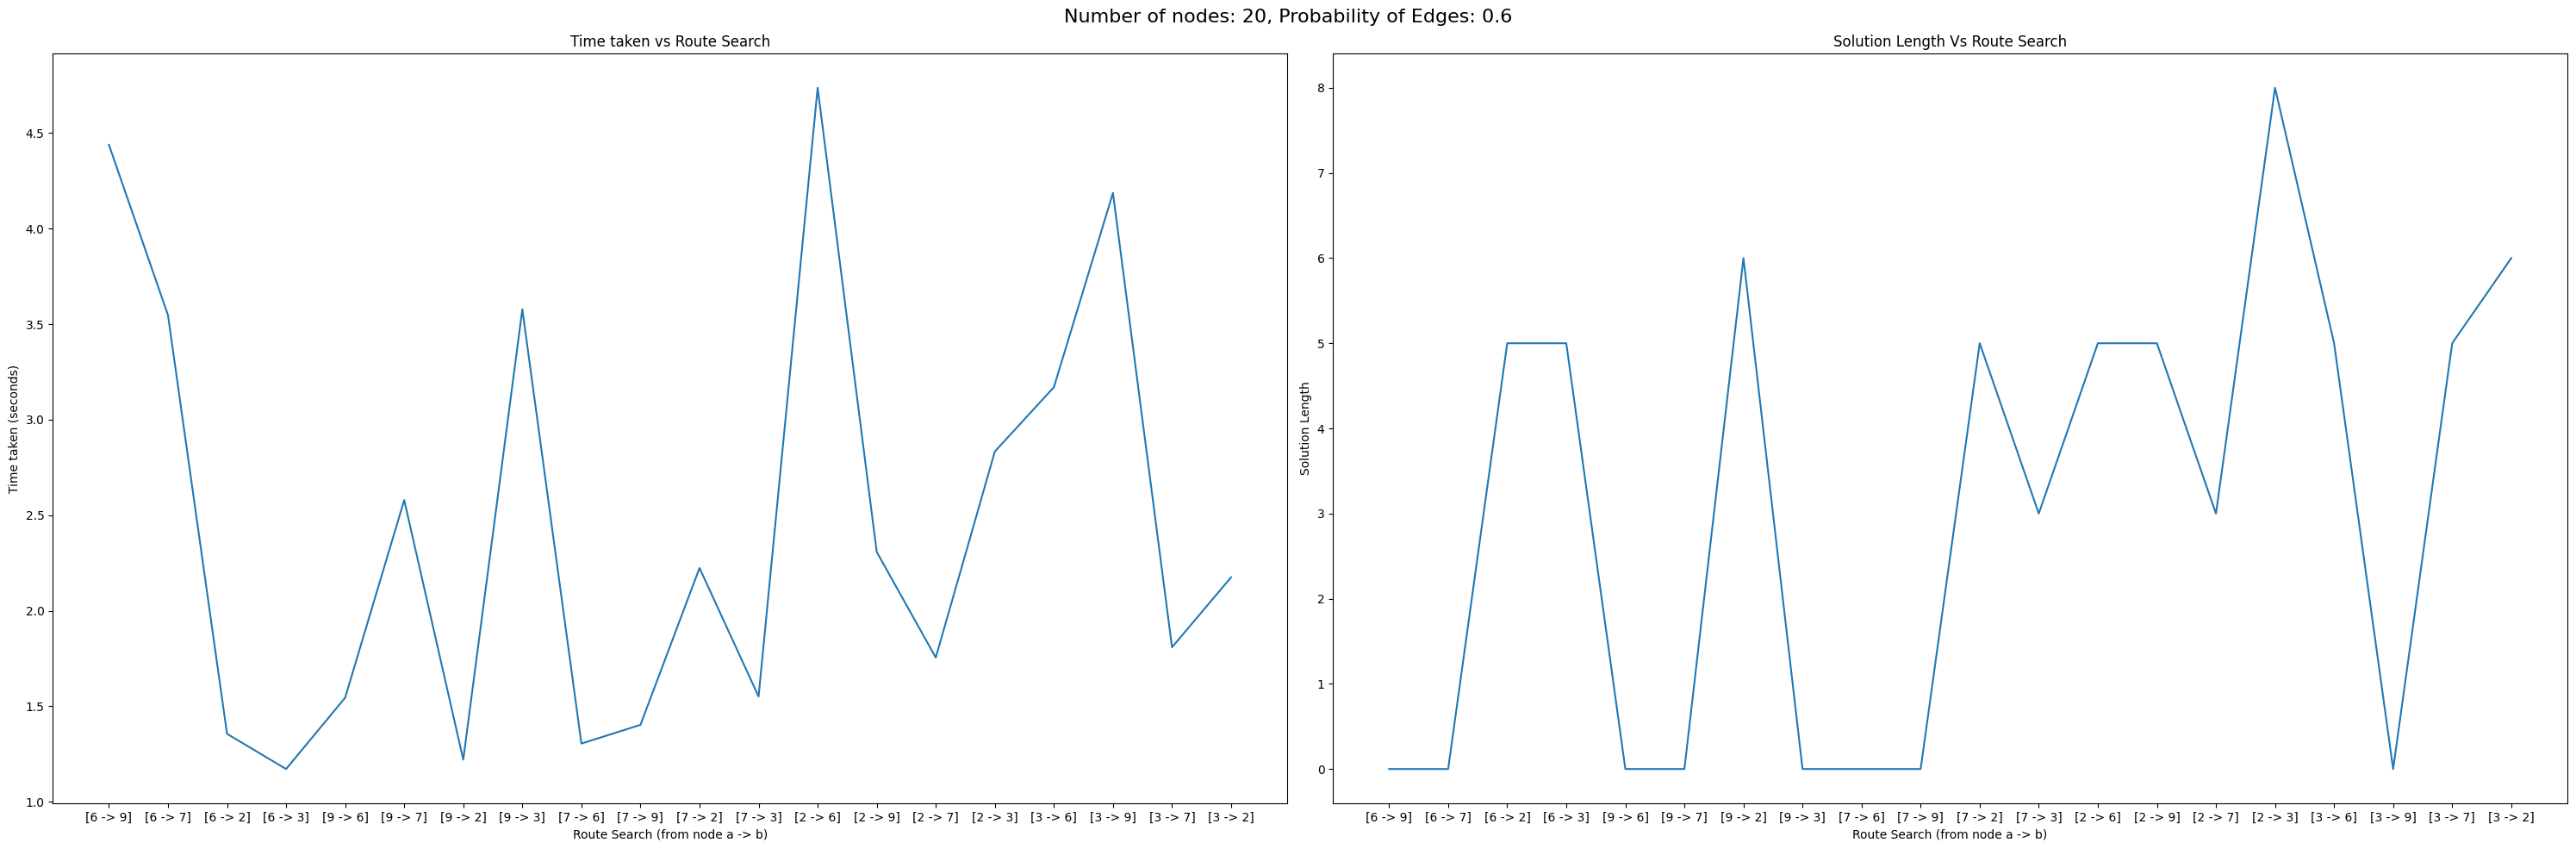

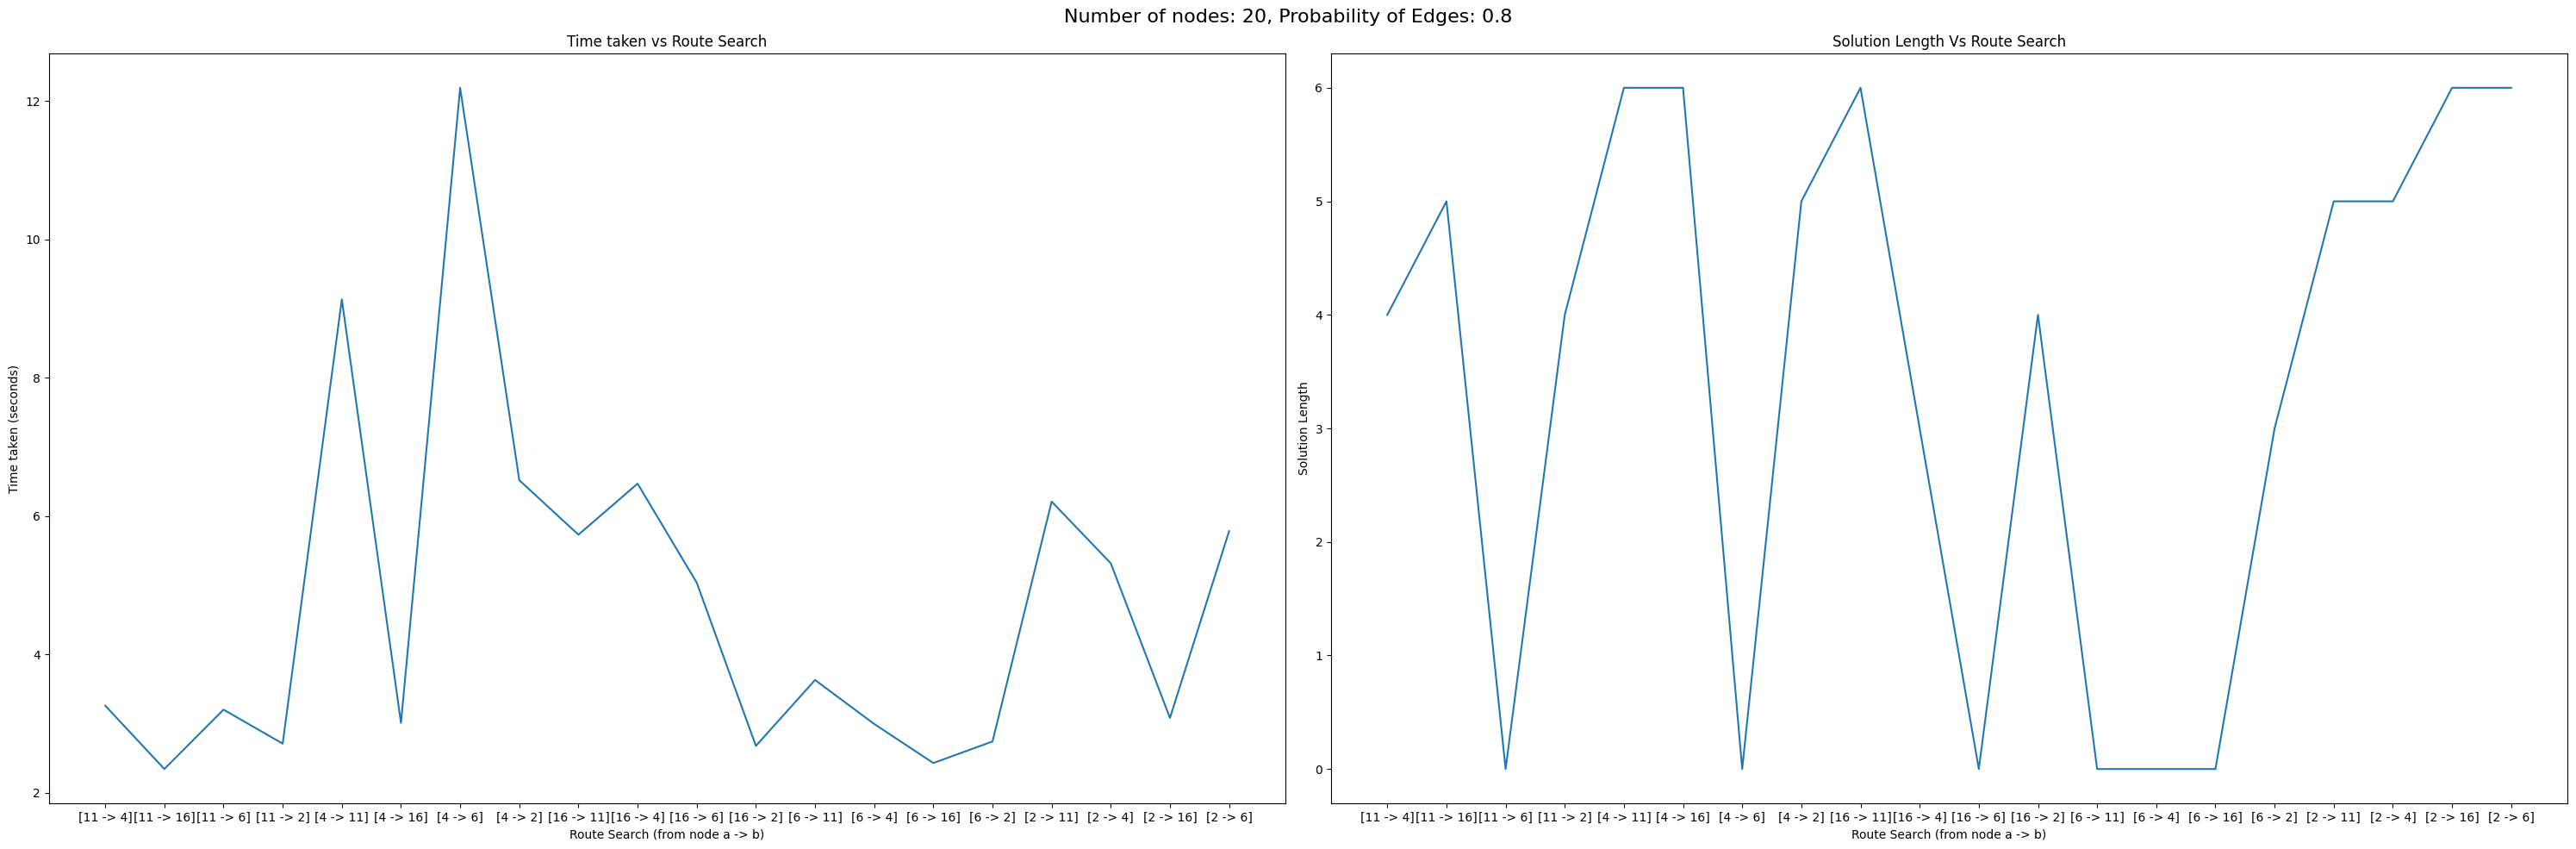

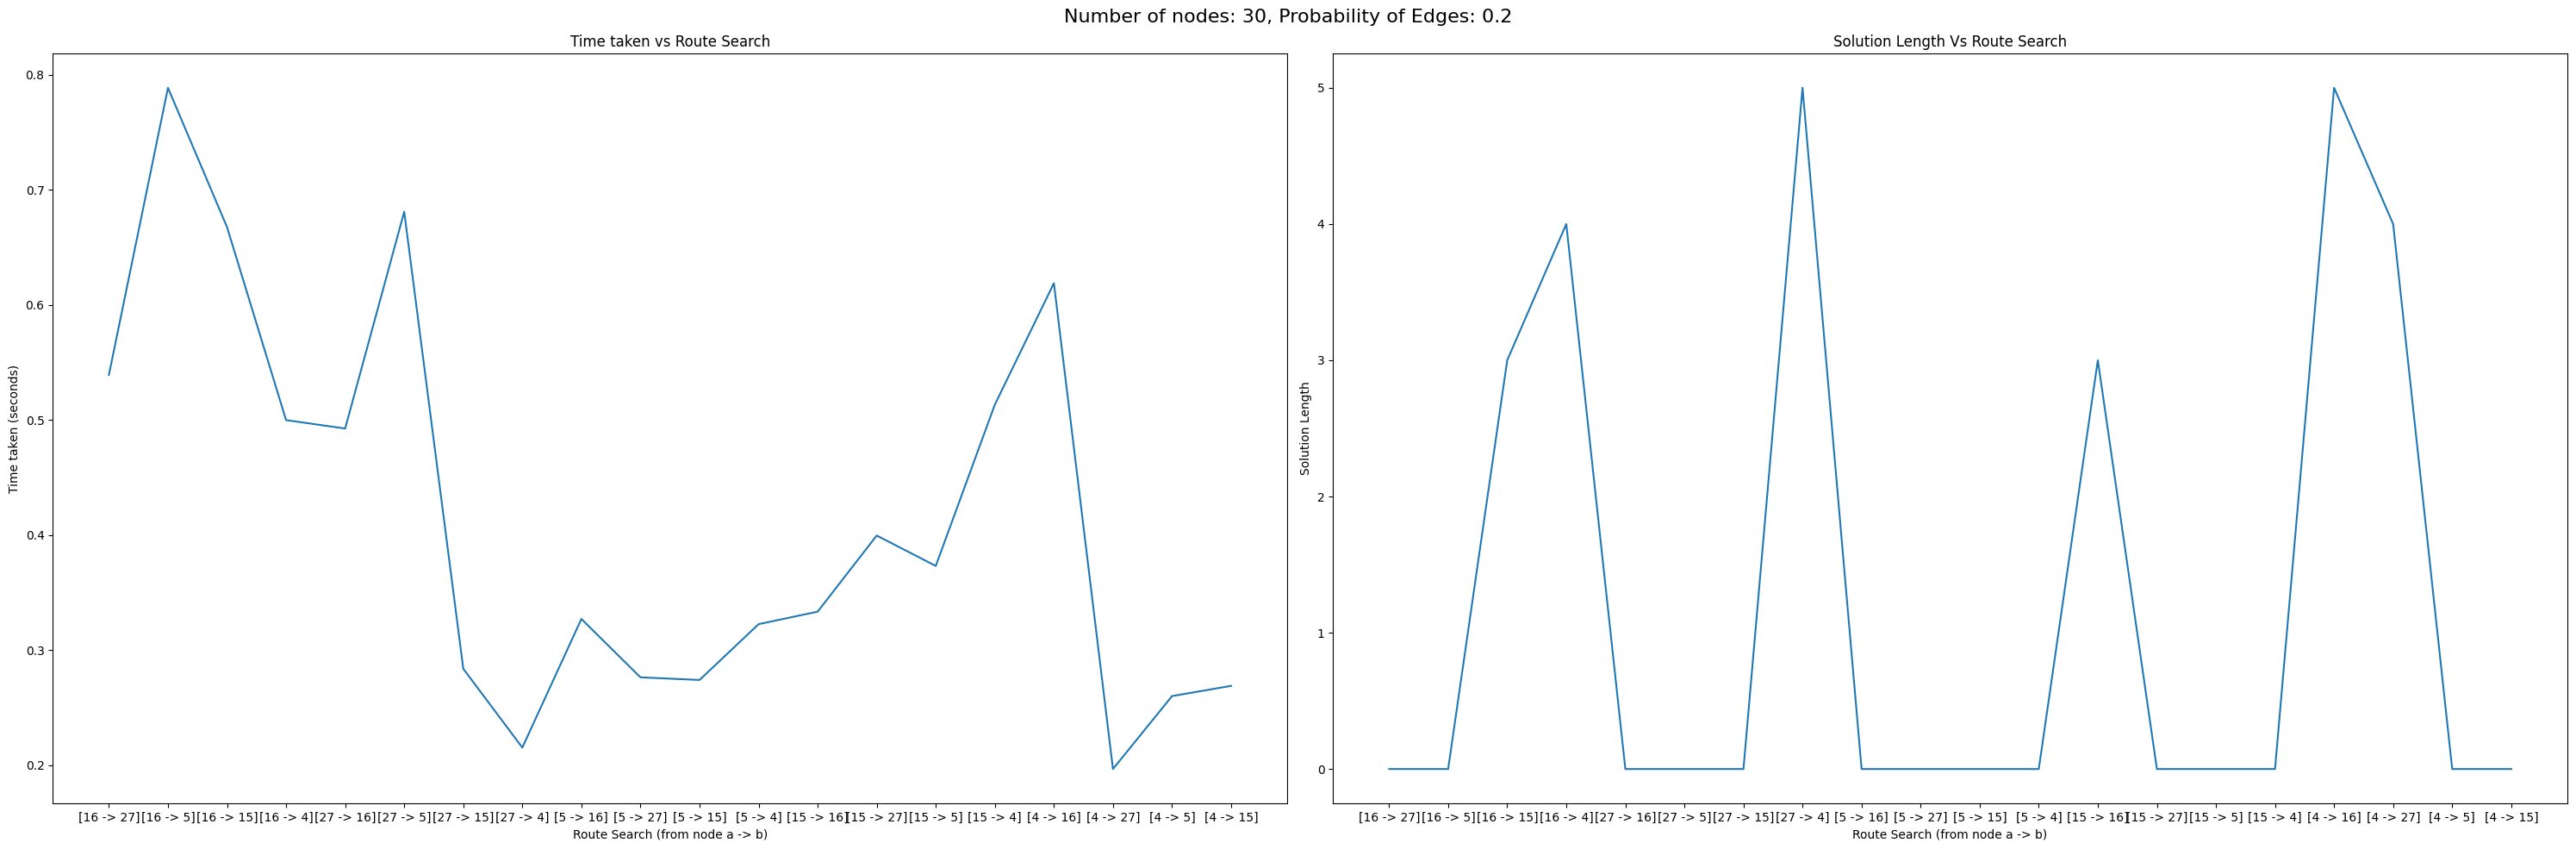

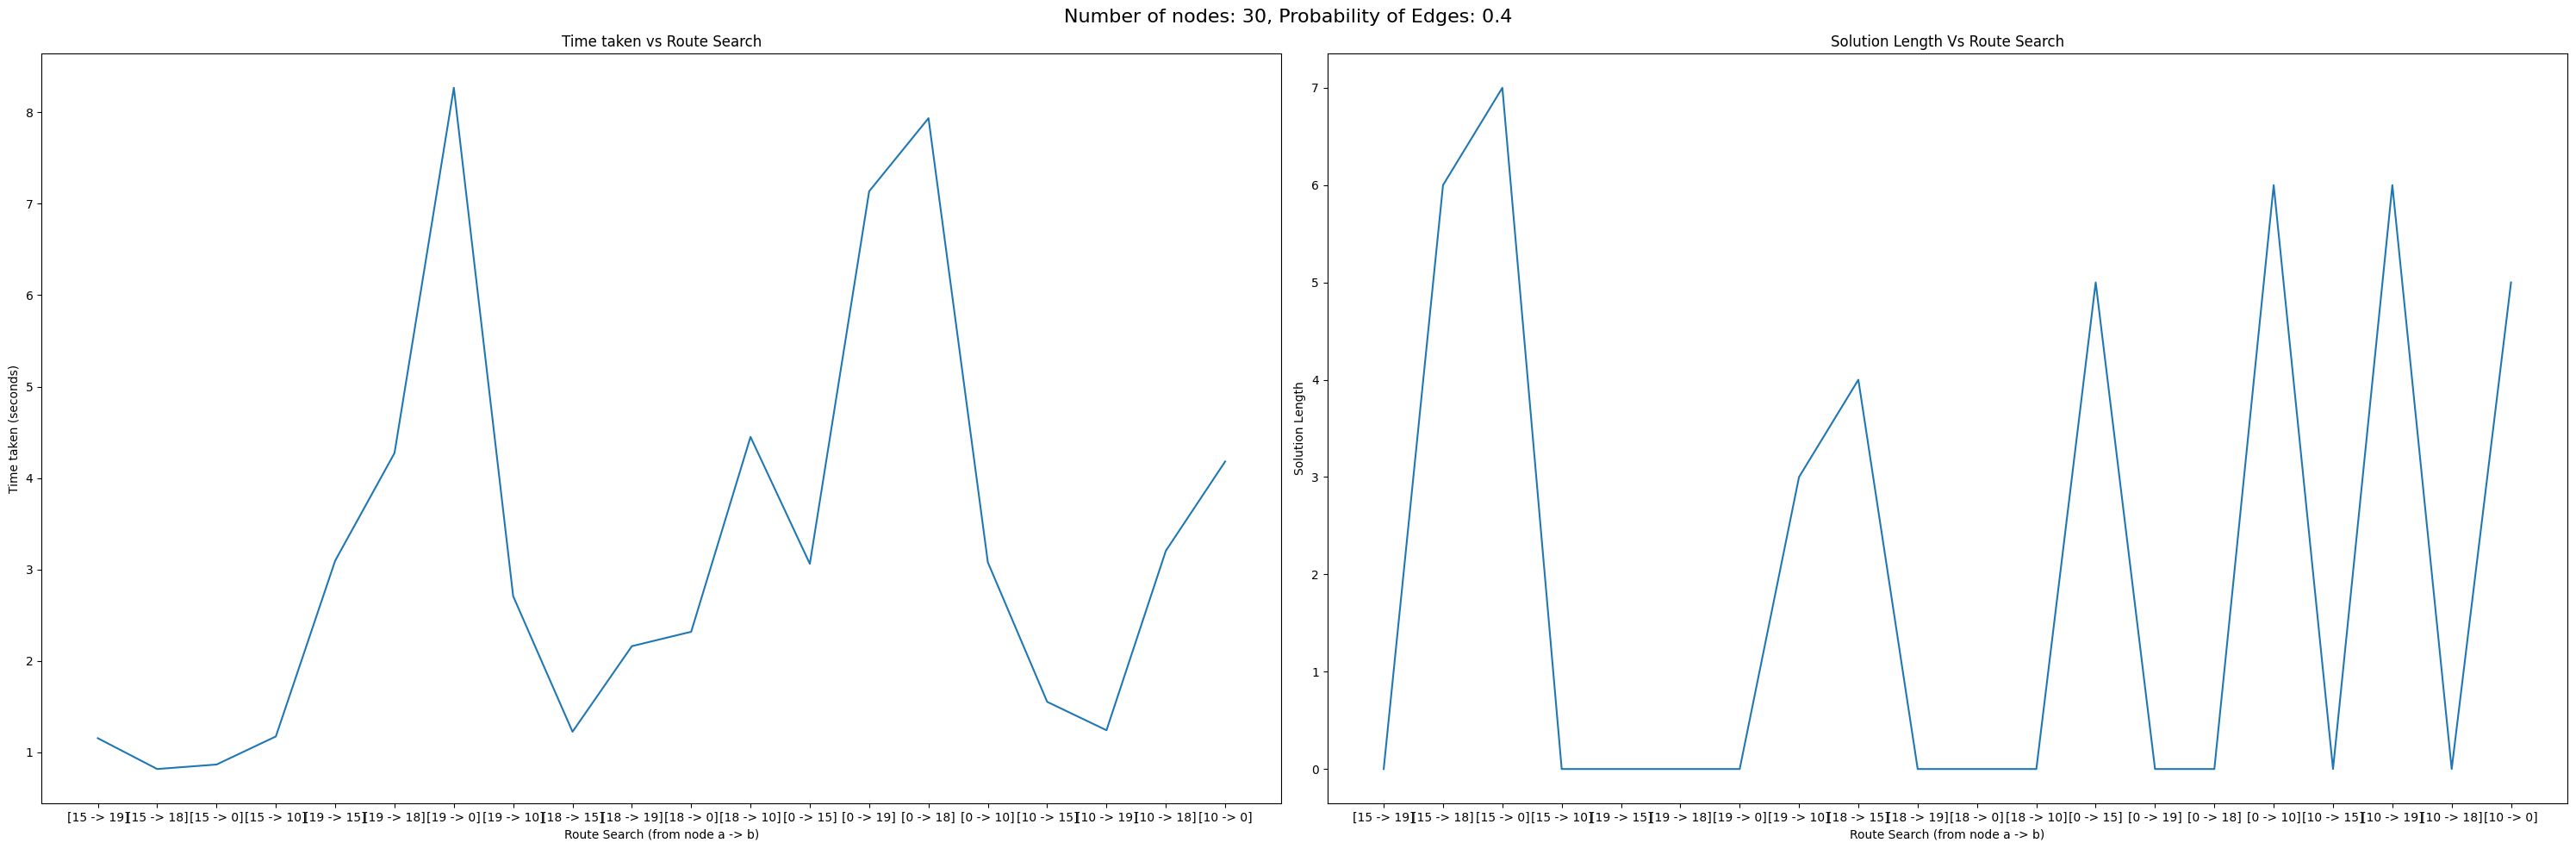

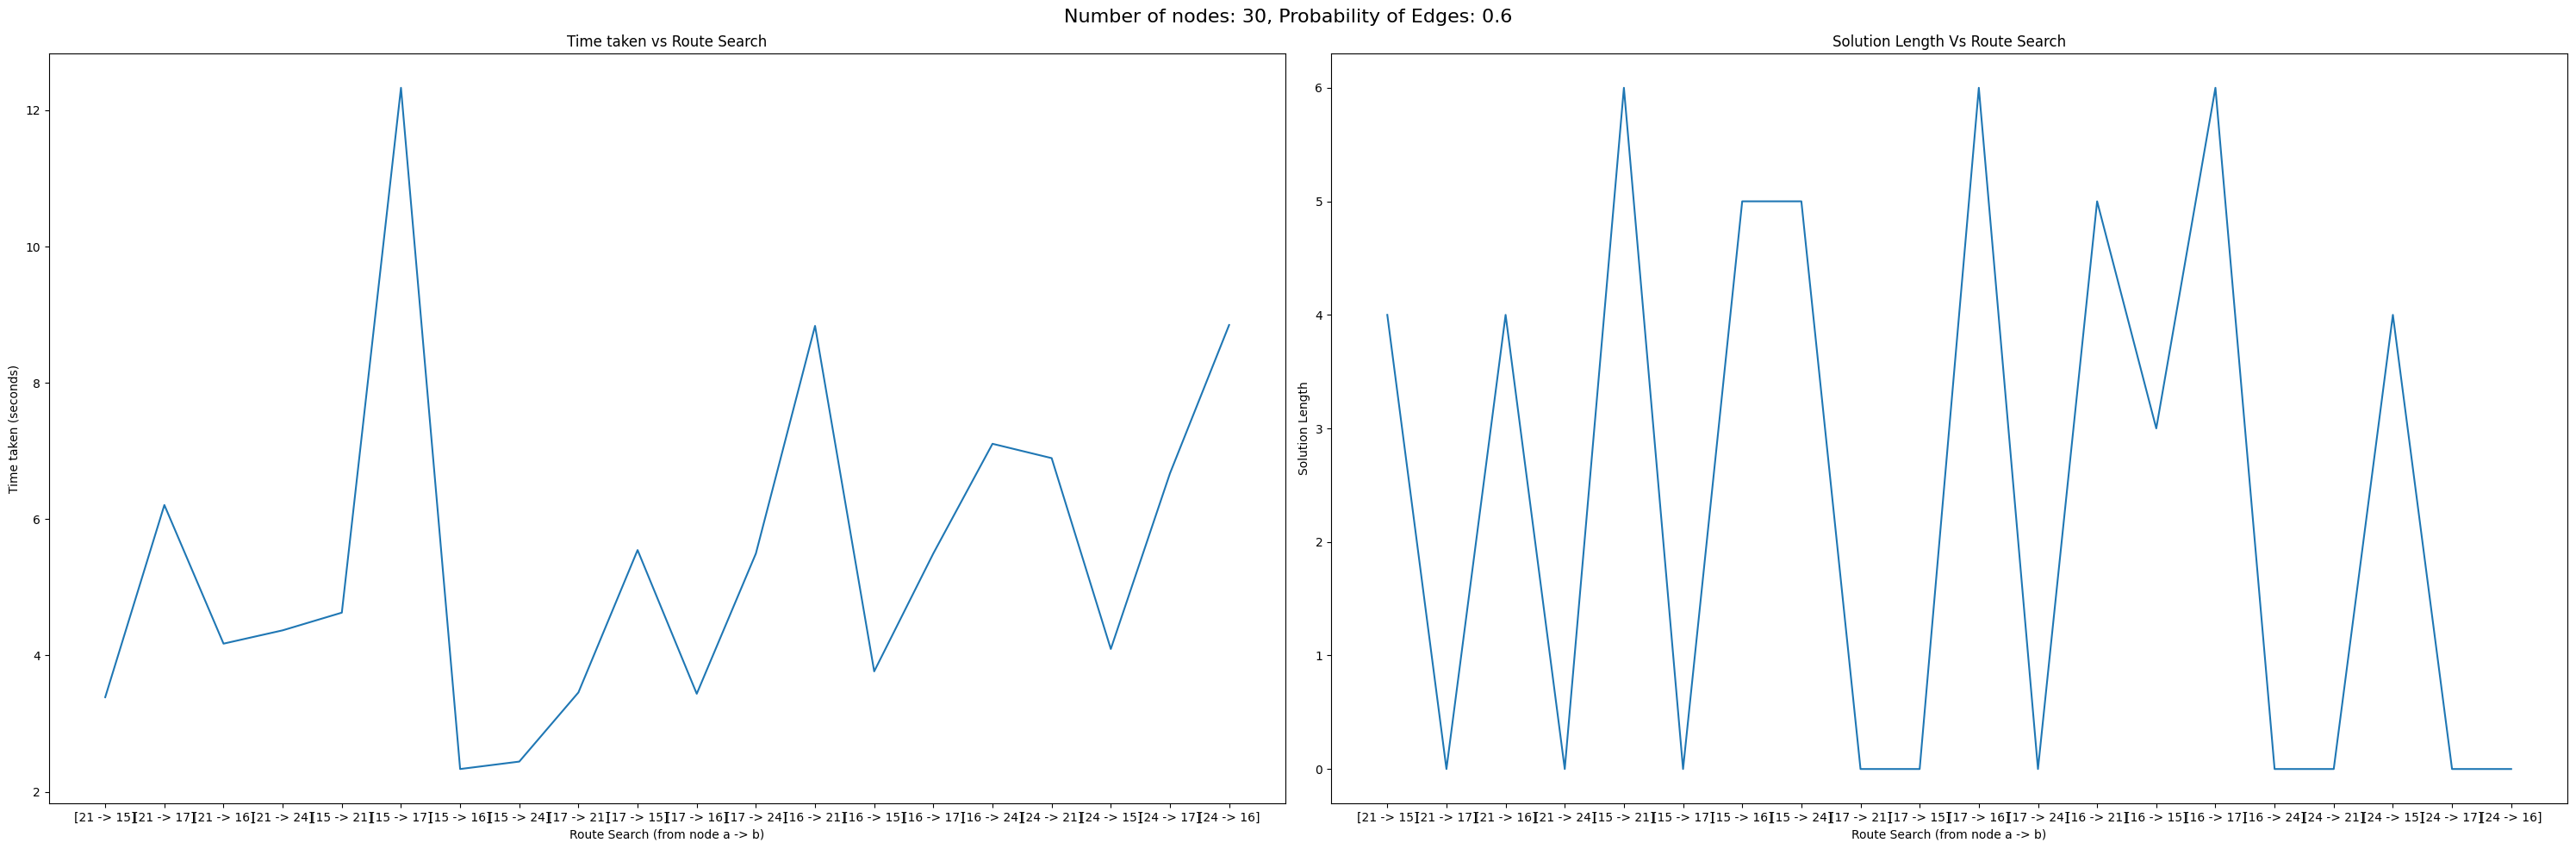

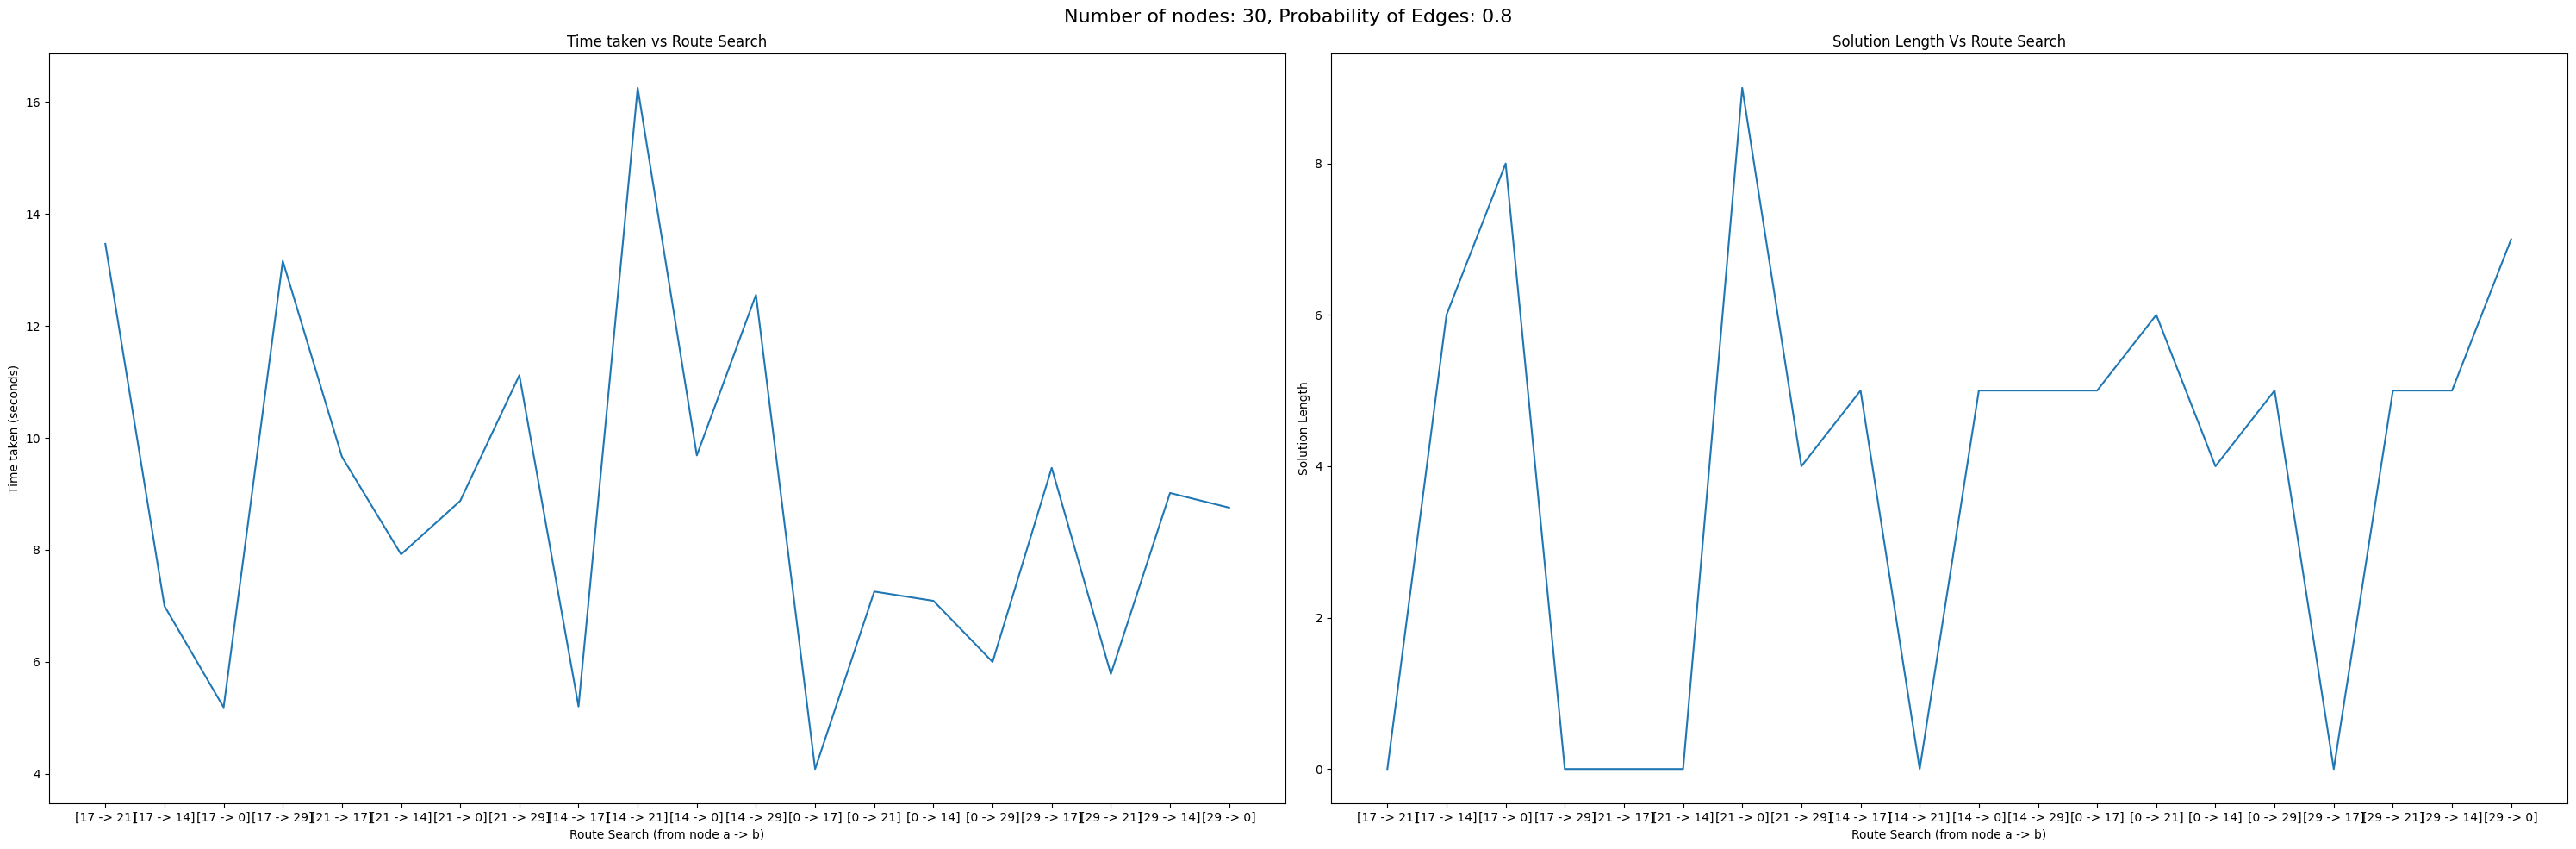

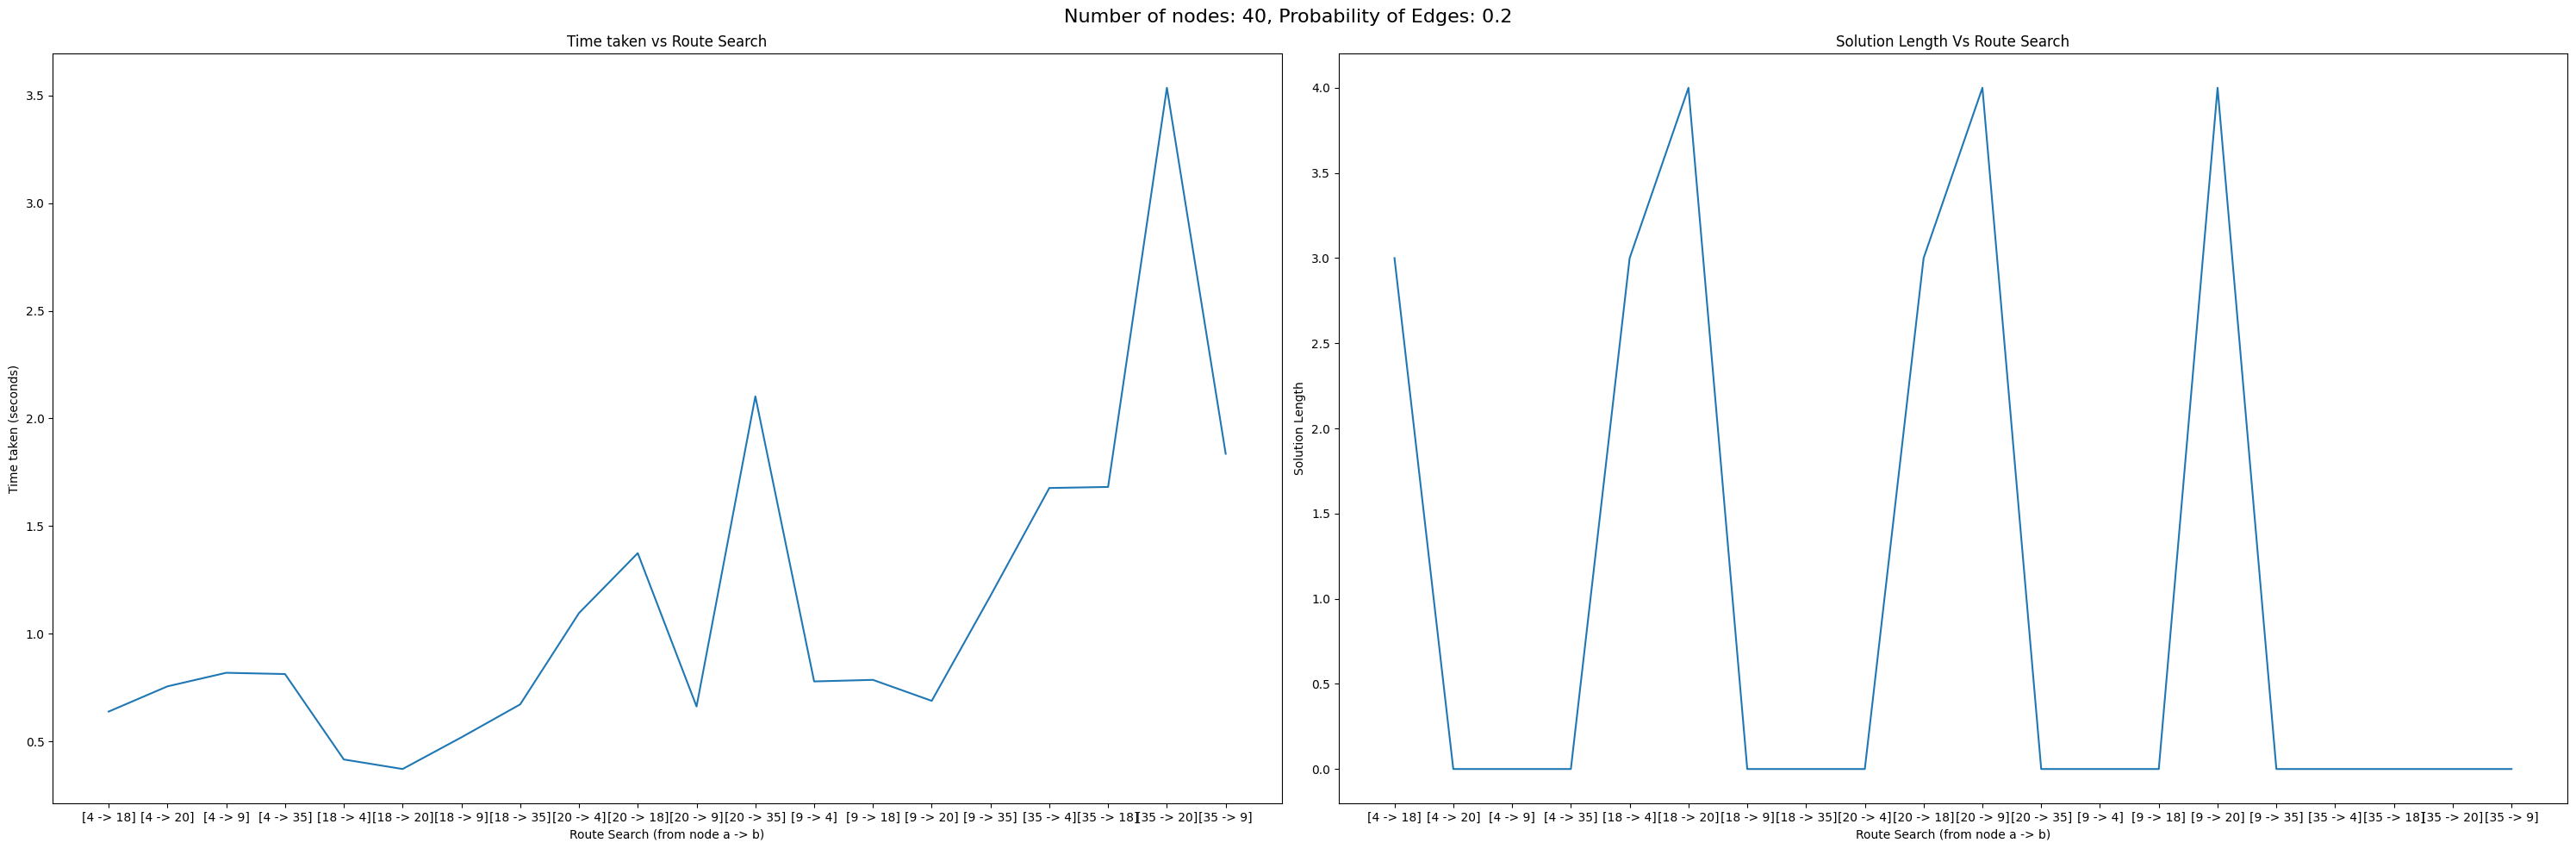

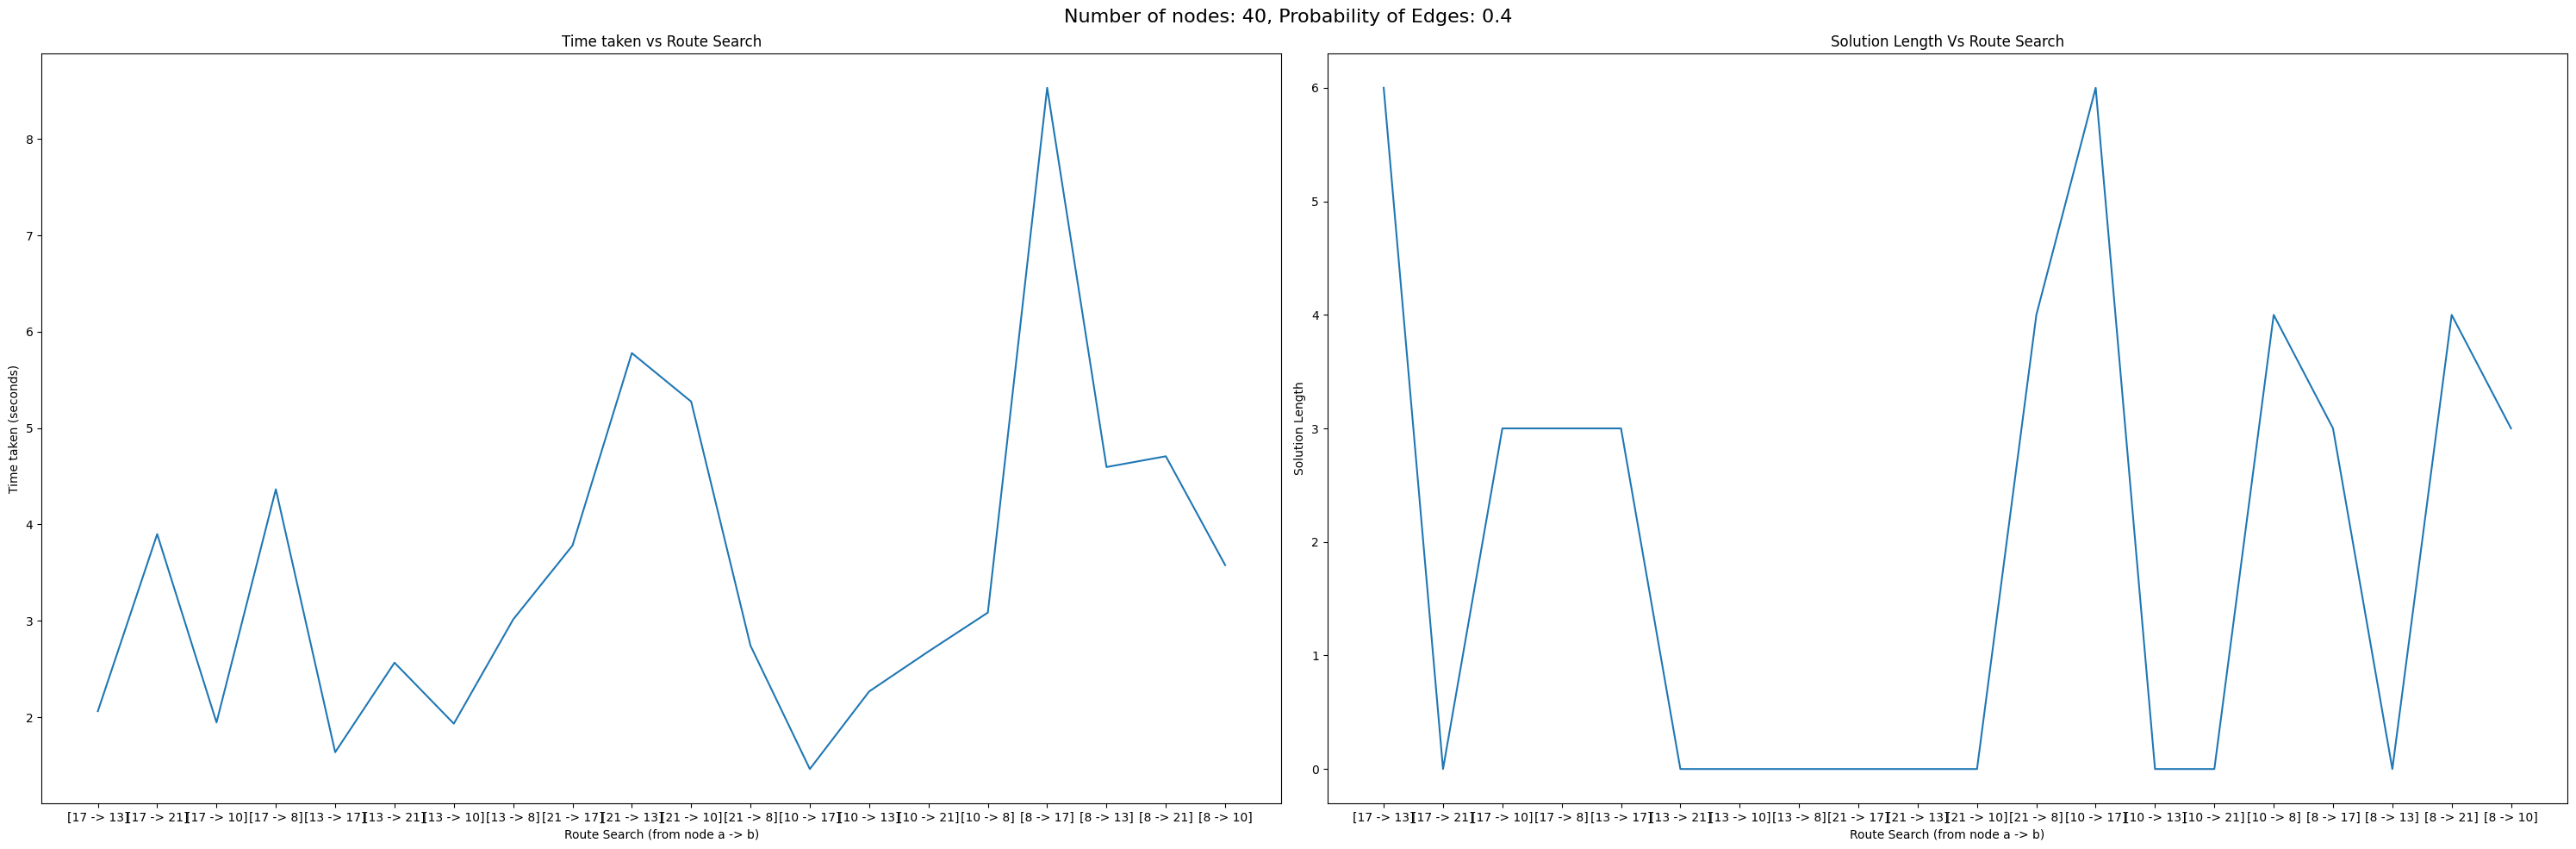

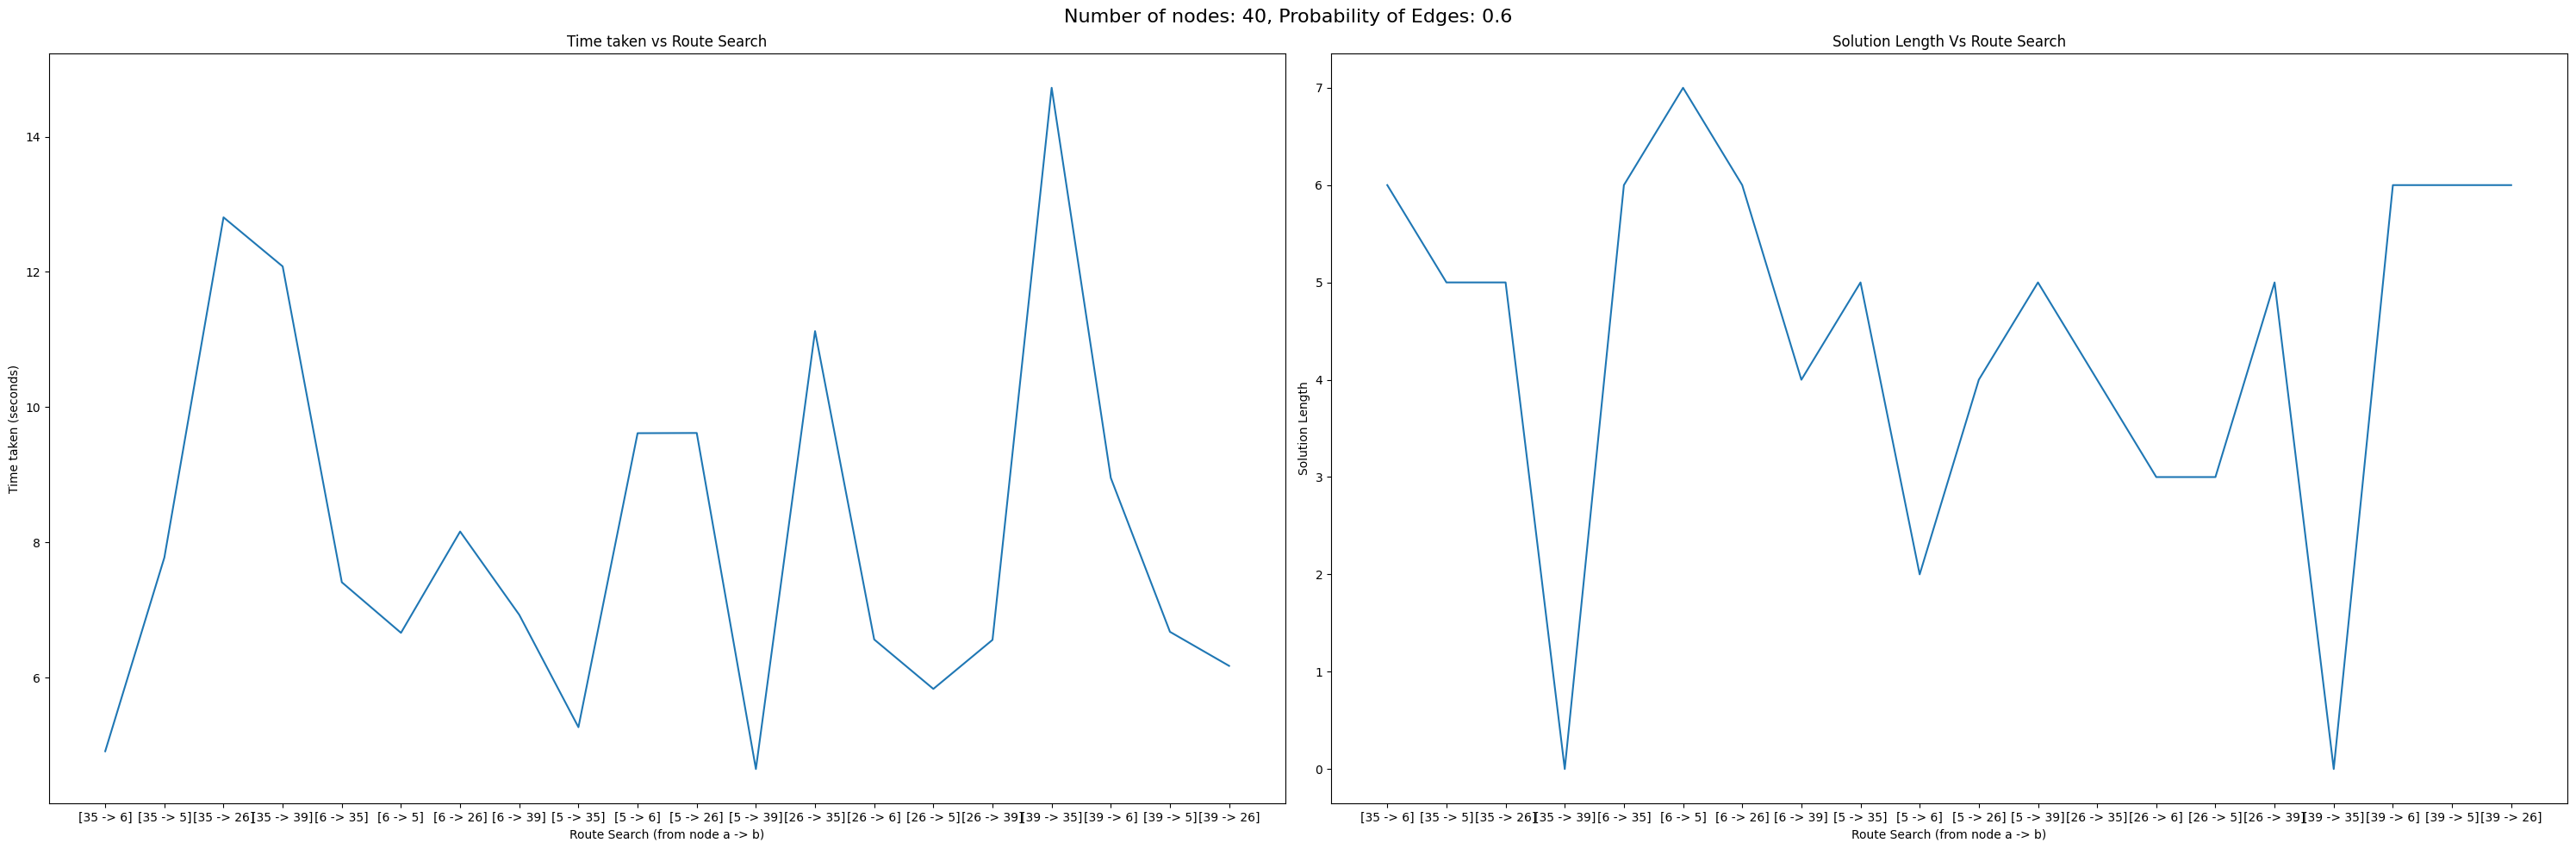

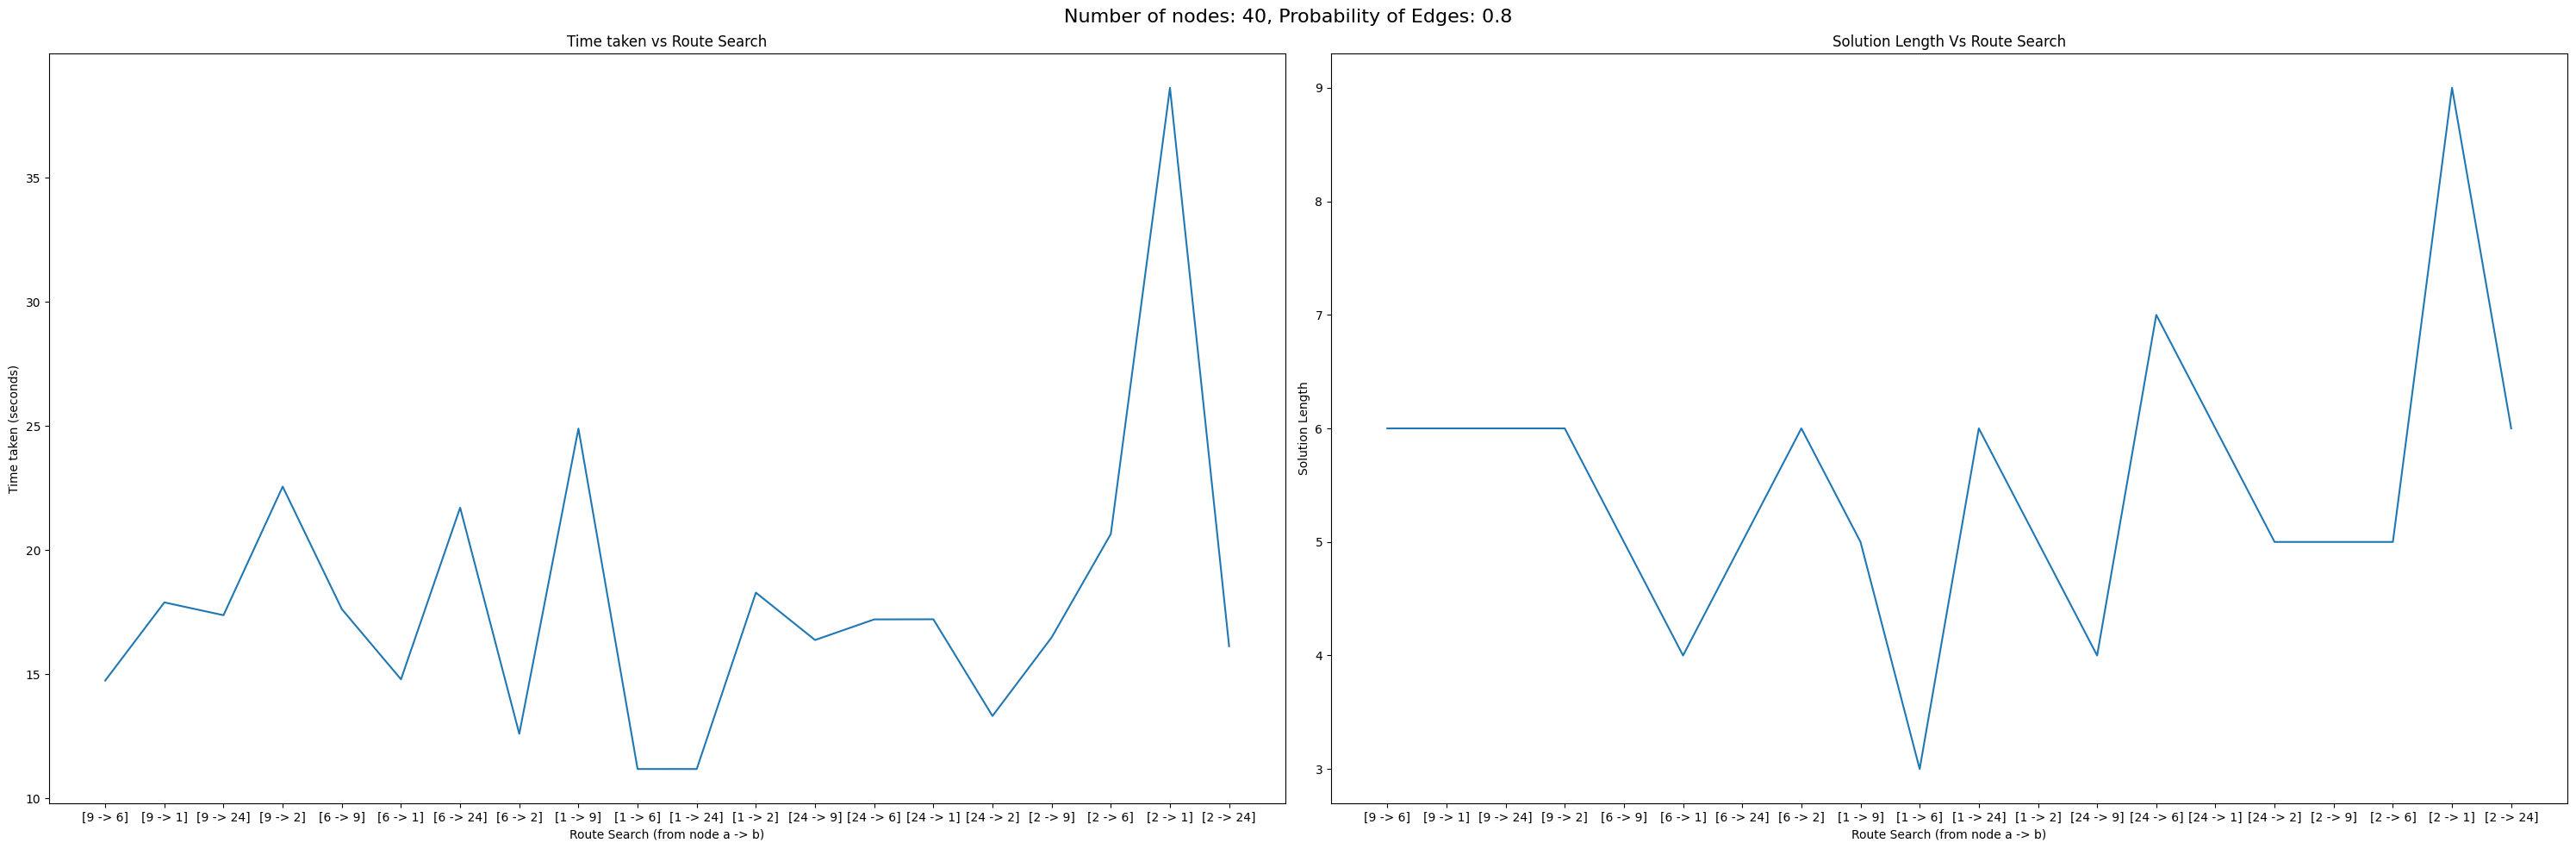

In [35]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plot_titles = ['Time taken vs Route Search', 'Solution Length Vs Route Search']

for i, (label, result) in enumerate(results.items()):
    search_list = list(result.keys())
    time_taken_list = list(time for time, path in result.values())
    solution_length_list = list(len(path) if path else 0 for time, path in result.values())

    fig, axs = plt.subplots(1, 2, figsize=(30, 10))

    axs[0].plot(search_list, time_taken_list)
    axs[0].set_xlabel('Route Search (from node a -> b)')
    axs[0].set_ylabel('Time taken (seconds)')
    axs[1].plot(search_list, solution_length_list)
    axs[1].set_xlabel('Route Search (from node a -> b)')
    axs[1].set_ylabel('Solution Length')

    # Set the title for each subplot pair
    for j, ax in enumerate(axs):
        ax.set_title(plot_titles[j])
        
    plt.suptitle(f'{label}', fontsize=16)
    plt.tight_layout()
    
    # Save the plot as a png files
    plt.savefig(f'output/{label}_plot.png', format='png')